In [1]:
!nvidia-smi

Thu Aug 26 13:58:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install image-quality

In [2]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.0 MB/s 


# Import libraries

In [3]:
#@title Libraries
%pylab inline
import imutils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab as pylab
import matplotlib.image as mpimg
from PIL import Image as im
# import segmentation_models_pytorch as smp
import cv2
from google.colab.patches import cv2_imshow
from scipy import ndimage, misc
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.patches as mpatches
from scipy.misc import face
from scipy.signal.signaltools import wiener
import sys
import numpy as np
import skimage.color
import skimage.filters
import skimage.io
import skimage.viewer
from skimage import feature, io, color, filters
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.filters import sobel
from skimage.draw import polygon
from skimage import exposure
from skimage.transform import resize
from PIL import Image
import scipy.ndimage as snd
#from meta-pseudo-labels.


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Viewer requires Qt


# Mount file syste,

In [4]:
#@title Driver mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import data

In [5]:

# import os
# input_dir = "/content/drive/MyDrive/Thesis/MINI-DDSM-Complete-JPEG-8/Data.xlsx"
root = '\\content\\drive\\MyDrive\\Thesis\\MINI-DDSM-Complete-JPEG-8\\'
# dfAll = pd.read_excel(input_dir)
# dfAll.head()

# Selecting and Sampling

In [ ]:
# data = dfAll.loc[(dfAll.Status == 'Benign') & (dfAll.Tumour_Contour != '-')].copy()
# data.reset_index(inplace = True, drop = True)
# Cancer_data = dfAll.loc[(dfAll.Status == 'Cancer') & (dfAll.Tumour_Contour != '-')].copy()
# Cancer_data.reset_index(inplace = True, drop = True)
# Normal_data = dfAll.loc[(dfAll.Status == 'Normal')].copy()
# Normal_data.reset_index(inplace = True, drop = True)
# data = data.append(Cancer_data, ignore_index = True)
# data = data.append(Normal_data, ignore_index = True)
# data = data.sample(frac=1).reset_index(drop=True)
# data.head()to

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Thesis/pos/data.csv')
df_ = pd.read_csv('/content/drive/MyDrive/Thesis/pos/data_p.csv')
dfc_ = pd.read_csv('/content/drive/MyDrive/Thesis/pos/data_c.csv')


In [7]:
data.head()

,fullPath,fileName,View,Side,Status,Age,Density,Tumour_Contour,Tumour_Contour2,Tumour_Contour3,Tumour_Contour4,Tumour_Contour5,Tumour_Contour6
0,Benign\0275\C_0275_1.RIGHT_MLO.png,C_0275_1.RIGHT_MLO.png,MLO,RIGHT,Benign,52.0,2,Benign\0275\C_0275_1.RIGHT_MLO_Mask.png,-,NaN,NaN,NaN,NaN
1,Cancer\3063\B_3063_1.RIGHT_CC.png,B_3063_1.RIGHT_CC.png,CC,RIGHT,Cancer,55.0,3,Cancer\3063\B_3063_1.RIGHT_CC_Mask.png,-,NaN,NaN,NaN,NaN
2,Normal\0572\A_0572_1.RIGHT_MLO.png,A_0572_1.RIGHT_MLO.png,MLO,RIGHT,Normal,72.0,4,-,-,NaN,NaN,NaN,NaN
3,Normal\0603\A_0603_1.RIGHT_CC.png,A_0603_1.RIGHT_CC.png,CC,RIGHT,Normal,76.0,1,-,-,NaN,NaN,NaN,NaN
4,Normal\1990\A_1990_1.RIGHT_MLO.png,A_1990_1.RIGHT_MLO.png,MLO,RIGHT,Normal,66.0,1,-,-,NaN,NaN,NaN,NaN


In [8]:
df_.head()

,image,mask,label,refrence
0,/content/drive/MyDrive/Thesis/pos/x/0.jpg,/content/drive/MyDrive/Thesis/pos/y/0.jpg,Benign,Benign\0275\C_0275_1.RIGHT_MLO.png
1,/content/drive/MyDrive/Thesis/pos/x/1.jpg,/content/drive/MyDrive/Thesis/pos/y/1.jpg,Cancer,Cancer\3063\B_3063_1.RIGHT_CC.png
2,/content/drive/MyDrive/Thesis/pos/x/2.jpg,/content/drive/MyDrive/Thesis/pos/y/2.jpg,Normal,Normal\0572\A_0572_1.RIGHT_MLO.png
3,/content/drive/MyDrive/Thesis/pos/x/3.jpg,/content/drive/MyDrive/Thesis/pos/y/3.jpg,Normal,Normal\0603\A_0603_1.RIGHT_CC.png
4,/content/drive/MyDrive/Thesis/pos/x/4.jpg,/content/drive/MyDrive/Thesis/pos/y/4.jpg,Normal,Normal\1990\A_1990_1.RIGHT_MLO.png


In [15]:
dfp = pd.read_csv('/content/drive/MyDrive/Thesis/pos/SCM2data.csv')
dfp.head()

,image,mask,label
0,/content/drive/MyDrive/Thesis/pos/Sx/0.jpg,/content/drive/MyDrive/Thesis/pos/Sy/0.jpg,Benign
1,/content/drive/MyDrive/Thesis/pos/Sx/1.jpg,/content/drive/MyDrive/Thesis/pos/Sy/1.jpg,Cancer
2,/content/drive/MyDrive/Thesis/pos/Sx/2.jpg,/content/drive/MyDrive/Thesis/pos/Sy/2.jpg,Normal
3,/content/drive/MyDrive/Thesis/pos/Sx/3.jpg,/content/drive/MyDrive/Thesis/pos/Sy/3.jpg,Normal
4,/content/drive/MyDrive/Thesis/pos/Sx/4.jpg,/content/drive/MyDrive/Thesis/pos/Sy/4.jpg,Normal


(3323, 2183, 3)


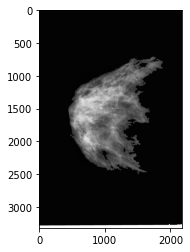

In [18]:
img = cv2.imread(dfp['image'][3565])
print(img.shape)
plt.imshow(img)

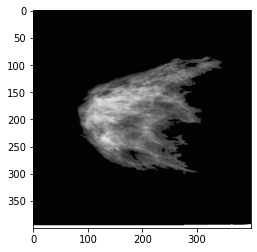

In [38]:
plt.imshow(cv2.resize(img, (400,400)))

SystemError: ignored

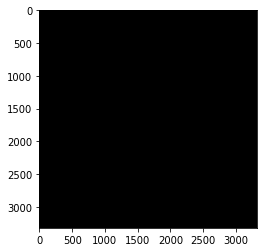

In [36]:
def expand2square(pil_img, background_color):
    width, height = pil_img.shape[:2]
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new('RGB', (width, width), background_color)
        plt.imshow(result)
        
        result[0:s_img.shape[0], 0:s_img.shape[1]] = s_img
        # result.paste(pil_img, (0, 0, width, height))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result


im_new = expand2square(img, (0, 0, 0)).resize((150, 150))
plt.imshow(im_new)

# Enchecement

## cONSTRACT

In [ ]:
#@title contrast_streching
def contrast_streching(img):
  img1 = img
  minmax_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')
  for i in range(img1.shape[0]):
      for j in range(img1.shape[1]):
          minmax_img[i,j] = 255*(img1[i,j]-np.min(img1))/(np.max(img1)-np.min(img1))
  
  return minmax_img

##  Morphological enhancement

In [ ]:
#@title morphological_enhancement
def morphological_enhancement(imag):
  # imag = cv2.imread(path, 0)
  rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
  tophat = cv2.morphologyEx(imag, cv2.MORPH_TOPHAT, rectKernel)
  blackhat = cv2.morphologyEx(imag, cv2.MORPH_BLACKHAT, rectKernel)
  imag = imag + tophat - blackhat


  return imag

## *Clahe*

In [ ]:
#@title clahe
def clahe(img, i):

  clahe = cv2.createCLAHE(clipLimit=i, tileGridSize=( grid_l,  grid_w))
  cl1 = clahe.apply(img)
  return cl1

# Image pre processing

## Mask label

In [ ]:
#@title Mask_label
def mask_label(image):
  #grid = int((image.shape[0]+image.shape[1])/1000)*3
  
  # img_clahe = clahe(image)
  # img_md_n = ndimage.median_filter(image, 3)
  # img_md = cv2.dilate(image, None, iterations=3)
  img_md = ndimage.median_filter(image, 5)
  # img_md = cv2.GaussianBlur(img,(5,5),0)

  left_nonzero = cv2.countNonZero(image[:, 0:int(image.shape[1]/2)])
  right_nonzero = cv2.countNonZero(image[:, int(image.shape[1]/2):])
  # flip_n = left_nonzero
  n =  np.mean(image[:, 0:int(image.shape[1]/2)][image[:, 0:int(image.shape[1]/2)] > 0] )
  n_l = len(image[:, 0:int(image.shape[1]/2)][image[:, 0:int(image.shape[1]/2)] > n] )
  
  if(left_nonzero < right_nonzero):
    # flip_n = right_nonzero
    n =  np.mean(image[:, int(image.shape[1]/2):][image[:, int(image.shape[1]/2):] > 0] )
    n_l = len(image[:, int(image.shape[1]/2):][image[:, int(image.shape[1]/2):] > n] )
  #     print('wtf')
  #     flip = True
  #     image = cv2.flip(image, 1)
  # img_md = cv2.dilate(img_md, None, iterations=7)
  # image_eq = cv2.equalizeHist(img_md)
  # ret,thresh1 = cv2.threshold(image_eq, 0,255, cv2.THRESH_OTSU)
  # np.mean(cv2.countNonZero(image[:, 0:int(image.shape[1]/2)]))
  # np.where(np.nonzero(image[:, 0:int(image.shape[1]/2)]

  ret,thresh  = cv2.threshold(img_md,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  thresh = cv2.dilate(thresh, None, iterations=5)
  # contours, hier = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  # contours2, hier2 = cv2.findContours(thresh2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  # cnts = cv2.findContours(thresh1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  # cnts = imutils.grab_contours(cnts)
  # contours,hierarchy = cv2.findContours(thresh2, 1, 2)

  # find contours in thresholded image, then grab the largest
  # one
  cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  c = max(cnts, key=cv2.contourArea)
  # # x_m = image.shape[0] - image.shape[0]/5
  # # x_n = image.shape[0]/5
  # # y_m =  image.shape[1] - image.shape[1]/4.2
  # d_image = np.sqrt( (image.shape[0]**2) + (image.shape[1]**2) )
  # max1 = 0
  # # max2 = 0
  # for cnt in contours:
  #   if cv2.contourArea(cnt) > max1:
  #     max1 = cv2.contourArea(cnt)
  left_nonzero = cv2.countNonZero(image[:, 0:int(image.shape[1]/2)])
  right_nonzero = cv2.countNonZero(image[:, int(image.shape[1]/2):])
  # flip_n = left_nonzero
  n =  np.mean(image[:, 0:int(image.shape[1]/2)][image[:, 0:int(image.shape[1]/2)] > 0] )
  n_l = len(image[:, 0:int(image.shape[1]/2)][image[:, 0:int(image.shape[1]/2)] > n] )
  s =  np.mean(thresh[:, 0:int(thresh.shape[1]/2)][thresh[:, 0:int(thresh.shape[1]/2)] > 0] )
  s_l = len(thresh[:, 0:int(thresh.shape[1]/2)][thresh[:, 0:int(thresh.shape[1]/2)] > s] )
  o =  np.mean(image[:, int(image.shape[1]/2):][image[:, int(image.shape[1]/2):] > 0] )
  o_l = len(image[:, int(image.shape[1]/2):][image[:, int(image.shape[1]/2):] > o] )
  if(left_nonzero < right_nonzero):
    # flip_n = right_nonzero
    n =  np.mean(image[:, int(image.shape[1]/2):][image[:, int(image.shape[1]/2):] > 0] )
    n_l = len(image[:, int(image.shape[1]/2):][image[:, int(image.shape[1]/2):] > n] )
    o =  np.mean(thresh[:, 0:int(thresh.shape[1]/2)][thresh[:, 0:int(thresh.shape[1]/2)] > 0] )
    o_l = len(thresh[:, 0:int(thresh.shape[1]/2)][thresh[:, 0:int(thresh.shape[1]/2)] > o] )
    s =  np.mean(image[:, int(image.shape[1]/2):][image[:, int(image.shape[1]/2):] > 0] )
    s_l = len(image[:, int(image.shape[1]/2):][image[:, int(image.shape[1]/2):] > s] )

  if s_l < o_l:
    for cnt in cnts: 
      if cv2.contourArea(cnt) < cv2.contourArea(c):
        (x,y,w,h) = cv2.boundingRect(cnt)
        cv2.drawContours(img_md, [cnt], 0, 0,-1)
  elif cv2.countNonZero(thresh) < n_l*0.95:
    for cnt in cnts: 
      if cv2.contourArea(cnt) < cv2.contourArea(c):
      #   hausdorff_sd = cv2.createHausdorffDistanceExtractor()
        (x,y,w,h) = cv2.boundingRect(cnt)
        cv2.drawContours(img_md, [cnt], 0, 0,-1)

  else:
    for cnt in cnts: 
      if cv2.contourArea(cnt) < cv2.contourArea(c):
      #   hausdorff_sd = cv2.createHausdorffDistanceExtractor()
        (x,y,w,h) = cv2.boundingRect(cnt)
        cv2.drawContours(thresh, [cnt], 0, 0,-1)
    img_md = image * thresh
      # cv2.(img_md,(x,y),(x+w,y+h),0,-1)
      # mask = np.zeros((img_md.shape), dtype=np.uint8)
      # cv2.fillPoly(img_md, (x,y),(x+w,y+h),0,-1)
      # img_md[np.where(mask
    # # 4. Calculate the distance between contours
    #   if hausdorff_sd.computeDistance(c, cnt) > d_image/5:
  # hausdorff_sd = cv2.createHausdorffDistanceExtractor()  
  # for x in range(img_md.shape[0]):
  #   for y in range(img_md.shape[1]):
  #           # for the given pixel at w,h, lets check its value against the threshold
            
  #     if hausdorff_sd.computeDistance((x,y,1,1) , cnt) > d_image/5:
  #       img_md[x, y] = 0
        # M = cv2.moments(cnt)
        # if M["m00"] < 1:
        #   M["m00"] =1
        # cX = int(M["m10"] / M["m00"])
        # cY = int(M["m01"] / M["m00"])
        # (x,y,w,h) = cv2.boundingRect(cnt)
        # if cX > x_m or cX < x_n or cY > y_m:
      # cv2.rectangle(img_md,(x,y),(x+w,y+h),0,-1)


  # for cnt in contours:
  #   if cv2.contourArea(cnt) > max2 and cv2.contourArea(cnt) < max1:
  #     max2 = cv2.contourArea(cnt)
  # x_m = image.shape[0] - image.shape[0]/5
  # x_n = image.shape[0]/5
  # y_m =  image.shape[1] - image.shape[1]/4.2
  # for cnt in contours: 
  #   M = cv2.moments(cnt)
  #   if M["m00"] < 1:
  #     M["m00"] =1
  #   cX = int(M["m10"] / M["m00"])
  #   cY = int(M["m01"] / M["m00"])
  #   (x,y,w,h) = cv2.boundingRect(cnt)
  #   if cX > x_m or cX < x_n or cY > y_m:
  #     print(x_m, x_n, y_m)
  #     print()
  #     print(cX, cY)
  #     cv2.rectangle(thresh2,(x,y),(x+w,y+h),0,-1)

  # max1 = 0
  # max2 = 0
  # for cnt in contours2:
  #   if cv2.contourArea(cnt) > max1:
  #     max1 = cv2.contourArea(cnt)

  # for cnt in contours2:
  #   if cv2.contourArea(cnt) > max2 and cv2.contourArea(cnt) < max1:
  #     max2 = cv2.contourArea(cnt)

  # for cnt in contours2:      
  #     if cv2.contourArea(cnt) < max2 * (max2/max1):
  #         (x,y,w,h) = cv2.boundingRect(cnt)
  #         cv2.rectangle(thresh2,(x,y),(x+w,y+h),0,-1)

  
  # lab_val = 255
  # kernel_size = 15
  # _, mammo_binary = cv2.threshold(img_md, 0, maxval=255, type=cv2.THRESH_BINARY)
  # n_labels, img_labeled, lab_stats, _ = cv2.connectedComponentsWithStats(
  #     thresh1, connectivity=8, ltype=cv2.CV_32S)
  # largest_obj_lab = np.argmax(lab_stats[1:, 4]) + 1
  # largest_mask = np.zeros(thresh1.shape, dtype=np.uint8)
  # largest_mask[img_labeled == largest_obj_lab] = lab_val
  
    

  # fig, axes = plt.subplots(1, 2, figsize=(15,10))
  # fig.tight_layout(pad=3.0)
  # axes[0].set_title('Image')
  # axes[0].imshow(img_md, cmap=pylab.cm.gray)
  # axes[0].axis('on')
  # axes[1].set_title('Mask')
  # axes[1].imshow(thresh, cmap=pylab.cm.gray)
  # axes[1].axis('on')
  # plt.show()
  # if flip == True:
  #   image = cv2.flip(image, 1)

  # plt.imshow(img, 'gray')

  return img_md

## Image flip

In [ ]:
#@title right_orient_mammogram

def right_orient_mammogram(image):
    flip = False
    left_nonzero = cv2.countNonZero(image[:, 0:int(image.shape[1]/2)])
    right_nonzero = cv2.countNonZero(image[:, int(image.shape[1]/2):])
    
    if(left_nonzero < right_nonzero):
        # print('wtf')
        flip = True
        image = cv2.flip(image, 1)
    # print(flip)    
    return [image, flip]

## Canny edge detection

In [ ]:
#@title Apply_canny
def apply_canny(image):
    #img_eq = exposure.equalize_hist(image)
    canny_img = canny(image, 6)
    return sobel(canny_img)

## Hough transform

In [ ]:
#@title get_hough_lines

def get_hough_lines(canny_img):
    h, theta, d = hough_line(canny_img)
    lines = list()
    # print('\nAll hough lines')
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        # print("Angle: {:.2f}, Dist: {:.2f}".format(np.degrees(angle), dist))
        x1 = 0
        y1 = (dist - x1 * np.cos(angle)) / np.sin(angle)
        x2 = canny_img.shape[1]
        y2 = (dist - x2 * np.cos(angle)) / np.sin(angle)
        lines.append({
            'dist': dist,
            'angle': np.degrees(angle),
            'point1': [x1, y1],
            'point2': [x2, y2]
        })
    
    return lines

## Lines selection

In [ ]:
#@title shortlist_lines
def shortlist_lines(lines, max_dist):
    MIN_ANGLE = 1
    MAX_ANGLE = 60
    MIN_DIST  = max_dist/100
    MAX_DIST  = max_dist*1.2
    
    shortlisted_lines = [x for x in lines if 
                          (x['dist']>=abs(MIN_DIST)) &
                          (x['dist']<=abs(MAX_DIST)) &
                          (x['angle']>=abs(MIN_ANGLE)) &
                          (x['angle']<=abs(MAX_ANGLE))
                        ]
    # print('\nShorlisted lines')
    # for i in shortlisted_lines:
    #     print("Angle: {:.2f}, Dist: {:.2f}".format(i['angle'], i['dist']))
        
    return shortlisted_lines

## Pectoral region selection

In [ ]:
#@title remove_pectoral
def remove_pectoral(shortlisted_lines):
    shortlisted_lines.sort(key = lambda x: x['dist'])
    pectoral_line = shortlisted_lines[0].copy()
    # shortlisted_lines.pop(0)
    d = pectoral_line['dist']
    theta = np.radians(pectoral_line['angle'])
    
    x_intercept = d/np.cos(theta)
    y_intercept = d/np.sin(theta)
    
    return polygon([0, 0, y_intercept], [0, x_intercept, 0])

## Image preprocessing process

In [ ]:
#@title breast_snip
def breast_snip(image, plotting=False):
    # img = io.imread(filename)
    # img = color.rgb2gray(img)
    # plt.imshow(img, 'gray')
    image = mask_label(image)
    flip_array = right_orient_mammogram(image)
    image = flip_array[0]
    img = clahe(image.copy(), 2)
    canny_img = apply_canny(img)
    lines = get_hough_lines(canny_img)
    shortlisted_lines = shortlist_lines(lines, img.shape[0]/1.5)

    # if plotting:
    #   fig, axes = plt.subplots(1, 4, figsize=(15,10))
    #   fig.tight_layout(pad=3.0)
    #   plt.xlim(0,img.shape[1])
    #   plt.ylim(img.shape[0])
      
      
    #   axes[0].set_title('Right-oriented mammogram')
    #   axes[0].imshow(img, cmap=pylab.cm.gray)
    #   axes[0].axis('on') 
      
    #   axes[1].set_title('Hough Lines on Canny Edge img')
    #   axes[1].imshow(canny_img, cmap=pylab.cm.gray)
    #   axes[1].axis('on')
    #   axes[1].set_xlim(0,img.shape[1])
    #   axes[1].set_ylim(img.shape[0])
    #   for line in lines:
    #       axes[1].plot((line['point1'][0],line['point2'][0]), (line['point1'][1],line['point2'][1]), '-r')
          
    #   axes[2].set_title('Shortlisted Lines')
    #   axes[2].imshow(canny_img, cmap=pylab.cm.gray)
    #   axes[2].axis('on')
    #   axes[2].set_xlim(0,img.shape[1])
    #   axes[2].set_ylim(img.shape[0])
    #   for line in shortlisted_lines:
    #       axes[2].plot((line['point1'][0],line['point2'][0]), (line['point1'][1],line['point2'][1]), '-r')
    if size(shortlisted_lines) > 0:
      rr, cc = remove_pectoral(shortlisted_lines)
      try:
        image[rr, cc] = 0
      except:
        pass
    # if plotting:
    #   axes[3].set_title('Pectoral muscle removed')
    #   axes[3].imshow(img, cmap=pylab.cm.gray)
    #   axes[3].axis('on')
    #   plt.show()
    if flip_array[1]:
      # print('yes')
      image = cv2.flip(image, 1)
    image = clahe(image, 2)
    return image

# Train data

## path_checker

In [ ]:
#@title check_path

def check_path(path):
  path = path.replace('\\', '/')
  try:
    # mask_ = imread(path,0)    
    im1 = Image.open(path)
    #rgb_im = mask_.convert('RGB')
    im1.save(path.replace('.png', '.jpg'))

    return path.replace('.png', '.jpg')
  except :
  
    try:
      # mask_ = imread(path,0) 
      path = path.replace('MASK', 'Mask')
      path = path.replace('.png', '.jpg')   
      im1 = Image.open(path)

      return path
    except :
      try:
        # mask_ = imread(path,0) 
        path = path.replace('Mask', 'MASK')
        path = path.replace('.png', '.jpg')   
        im1 = Image.open(path)

        return path
      except :
        try:
          path = path.replace('.png', '.jpg')
          return path
        except:
          pass


## Adding image and mask to train data

In [ ]:
#@title add_image_and_mask 1 channels contour mask

def add_image_and_mask(img, data, index):
  n= index
  img = resize(img, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),mode='constant',  
                                  preserve_range=True)
  X_train[n] = img  #Fill empty X_train with values from img
  Main_mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
  masks = []

  if data['Tumour_Contour'][i] != '-':
    masks.append(check_path(root + data['Tumour_Contour'][i]))
  if data['Tumour_Contour2'][i] != '-':
    masks.append(check_path(root + data['Tumour_Contour2'][i]))
  if pd.isnull(data["Tumour_Contour3"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour3'][i]))
  if pd.isnull(data["Tumour_Contour4"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour4'][i]))
  if pd.isnull(data["Tumour_Contour5"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour5'][i]))
  if pd.isnull(data["Tumour_Contour6"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour6'][i]))
  for mask in masks:
    mask_ = imread(mask)
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                  preserve_range=True), axis=-1)
    Main_mask = np.maximum(Main_mask, mask_) 

  # for mask in masks:
  #   mask.save(path)
  #   mask_ = imread(mask)
  #   mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
  #                                 preserve_range=True), axis=-1)
  #   mask = np.maximum(Main_mask, mask_)  
            
  Y_train[n] = Main_mask 

## mask add

In [ ]:
last_mask = None
i_c=0

In [ ]:
#@title add_image_and_mask 3 channels mask
def mask_add(img, data, index):
  i = index
  global i_c
  global last_mask
  path = root + data["fullPath"][i]#2499 2
  path = path.replace('\\', '/')
  path = path.replace('.png', '.jpg')
  img = cv2.imread(path, 0)

  Main_mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)
  masks = []
  if data['Tumour_Contour'][i] != '-':
    masks.append(check_path(root + data['Tumour_Contour'][i]))
  if data['Tumour_Contour2'][i] != '-':
    masks.append(check_path(root + data['Tumour_Contour2'][i]))
  if pd.isnull(data["Tumour_Contour3"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour3'][i]))
  if pd.isnull(data["Tumour_Contour4"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour4'][i]))
  if pd.isnull(data["Tumour_Contour5"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour5'][i]))
  if pd.isnull(data["Tumour_Contour6"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour6'][i]))
  for mask in masks:
    ini_img = img.copy()
    mask_ = imread(mask)
    last_mask = mask_.copy()
    img_mask = mask_.copy() 
    ret,thresh = cv2.threshold(img_mask, 0,255, cv2.THRESH_OTSU)
    contours, hier = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:      
      (x,y,w,h) = cv2.boundingRect(cnt)
      # cv2.drawContours(mask_, [cnt], 0,(255, 0, 0),-1)
      cv2.drawContours(img_mask, [cnt], 0,(0, 0, 255),-1)
    # print( np.where(np.nonzero(np.squeeze(Main_mask))))
    # ini_img = ini_img * mask_
    img_mask = cv2.resize(img_mask, (ini_img.shape[0], ini_img.shape[1]))
    ini_img[np.where(img_mask==0), -1] = 0
    save_c = "/content/drive/MyDrive/Thesis/pos/x_/" + str(i_c) + ".jpg"
    cv2.imwrite(save_c, ini_img[y:y+h,x:x+w])
    List = [save_c, data['Status'][i]]
    dfc_.loc[i_c] = List
    i_c = i_c+1
    mask_ = np.expand_dims(resize(mask_, (img.shape[0], img.shape[1]), mode='constant',  
                                preserve_range=True), axis=-1)
    Main_mask = np.maximum(Main_mask, mask_)

  if len(masks) <1:
    # if last_mask == None:
    #   path_ = root + data['Tumour_Contour'][0]
    #   path_ = path.replace('\\', '/')
    #   last_mask = Image.open(path_)
    # ini_img = img.copy()
    img_mask = last_mask.copy()
    ret,thresh = cv2.threshold(img_mask, 0,255, cv2.THRESH_OTSU)
    contours, hier = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)   
    for cnt in contours:      
      (x,y,w,h) = cv2.boundingRect(cnt)
      cv2.drawContours(img_mask, [cnt], 0,(0, 0, 255),-1)
    # print( np.where(np.nonzero(np.squeeze(Main_mask))))
    # ini_img = ini_img * mask_
    img_mask = cv2.resize(img_mask, (img.shape[0], img.shape[1]))
    plt,imshow(img_mask)
    img[np.where(img_mask==0), -1] = 0
    save_c = "/content/drive/MyDrive/Thesis/pos/x_/" + str(i_c) + ".jpg"
    # if ini_img.em
    cv2.imwrite(save_c, img[y:y+h,x:x+w])
    List = [save_c, data['Status'][i]]
    dfc_.loc[i_c] = List
    i_c = i_c+1

  save_m = "/content/drive/MyDrive/Thesis/pos/y/" + str(index) + ".jpg"
  cv2.imwrite(save_m, np.squeeze(Main_mask))
'''

    mask_ = imread(mask)
    mask_ = np.expand_dims(resize(mask_, (img.shape[0], img.shape[1]), mode='constant',  
                                  preserve_range=True), axis=-1)
    if data["Status"][i] == 'Cancer':
      Main_mask[:,:,2] = np.maximum(Main_mask[:,:,2], mask_[:,:,0])
      Main_mask[:,:,2][np.nonzero(Main_mask[:,:,2])] = 255
    if data["Status"][i] == 'Benign':
      Main_mask[:,:,0] = np.maximum(Main_mask[:,:,0], mask_[:,:,0])
      Main_mask[:,:,0][np.nonzero(Main_mask[:,:,0])] = 127
  # plt.imsave("/content/drive/MyDrive/Thesis/pos/y/0.jpg", np.squeeze(Main_mask))
  save_m = "/content/drive/MyDrive/Thesis/pos/y/" + str(i) + ".jpg"
  cv2.imwrite(save_m, np.squeeze(Main_mask))
  # img_mask = i_mask.save("/content/drive/MyDrive/Thesis/pos/y/0.jpg", 'jpeg')
  img_mask = cv2.imread(save_m, cv2.IMREAD_COLOR)
  plt.imshow(img_mask,)
  i_mask = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)
  ret,thresh = cv2.threshold(i_mask, 0,255, cv2.THRESH_OTSU)

  # contours,_ = cv2.findContours(img, cv2.RETR_LIST, cv2.cv.CV_CHAIN_APPROX_NONE)
  contours, hier = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  # print(len(contours))
  if data["Status"][i] == 'Cancer':
    for cnt in contours:      
      (x,y,w,h) = cv2.boundingRect(cnt)
      cv2.drawContours(img_mask, [cnt], 0,(255, 0, 0),-1)
    # print( np.where(np.nonzero(np.squeeze(Main_mask))))
    img_mask[:,:,0][np.nonzero(Main_mask[:,:,2])] = 127
    img_mask[:,:,2][np.nonzero(Main_mask[:,:,2])] = 255
  if data["Status"][i] == 'Benign':
    for cnt in contours:      
      (x,y,w,h) = cv2.boundingRect(cnt)
      cv2.drawContours(img_mask, [cnt], 0,(0, 0, 127),-1)
    # print( np.where(np.nonzero(np.squeeze(Main_mask))))
    img_mask[:,:,2][np.nonzero(Main_mask[:,:,0])] = 255
    img_mask[:,:,0][np.nonzero(Main_mask[:,:,0])] = 127
  # plt.imshow(thresh, 'gray')
  # ar_img = np.expand_dims(resize(thresh, (img.shape[0], img.shape[1]), mode='constant',  
  #                                 preserve_range=True), axis=-1)
  # Main_mask[:,:,2] = Main_mask[:,:,2] + ar_img[:,:,0]
  # Main_mask[:,:,1] = Main_mask[:,:,1] + ar_img[:,:,0]
  cv2.imwrite(save_m, img_mask)
'''

'\n\n    mask_ = imread(mask)\n    mask_ = np.expand_dims(resize(mask_, (img.shape[0], img.shape[1]), mode=\'constant\',  \n                                  preserve_range=True), axis=-1)\n    if data["Status"][i] == \'Cancer\':\n      Main_mask[:,:,2] = np.maximum(Main_mask[:,:,2], mask_[:,:,0])\n      Main_mask[:,:,2][np.nonzero(Main_mask[:,:,2])] = 255\n    if data["Status"][i] == \'Benign\':\n      Main_mask[:,:,0] = np.maximum(Main_mask[:,:,0], mask_[:,:,0])\n      Main_mask[:,:,0][np.nonzero(Main_mask[:,:,0])] = 127\n  # plt.imsave("/content/drive/MyDrive/Thesis/pos/y/0.jpg", np.squeeze(Main_mask))\n  save_m = "/content/drive/MyDrive/Thesis/pos/y/" + str(i) + ".jpg"\n  cv2.imwrite(save_m, np.squeeze(Main_mask))\n  # img_mask = i_mask.save("/content/drive/MyDrive/Thesis/pos/y/0.jpg", \'jpeg\')\n  img_mask = cv2.imread(save_m, cv2.IMREAD_COLOR)\n  plt.imshow(img_mask,)\n  i_mask = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)\n  ret,thresh = cv2.threshold(i_mask, 0,255, cv2.THRESH_OT

In [ ]:
#@title SSim

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error



def ssim_mse(img, img_const):


  mse_const = mean_squared_error(img, img_const)
  ssim_const = ssim(img, img_const,
                    data_range=img_const.max() - img_const.min())

  return mse_const, ssim_const


# PRE P

In [ ]:

def select_largest_obj(img_bin, lab_val=255, fill_holes=True, 
                       smooth_boundary=True, kernel_size=15):
    '''Select the largest object from a binary image and optionally
    fill holes inside it and smooth its boundary.
    Args:
        img_bin(2D array): 2D numpy array of binary image.
        lab_val([int]): integer value used for the label of the largest 
                        object. Default is 255.
        fill_holes([boolean]): whether fill the holes inside the largest 
                               object or not. Default is false.
        smooth_boundary([boolean]): whether smooth the boundary of the 
                                    largest object using morphological 
                                    opening or not. Default is false.
        kernel_size([int]): the size of the kernel used for morphological 
                            operation.
    '''
    
    n_labels, img_labeled, lab_stats, _ = cv2.connectedComponentsWithStats(
        img_bin, connectivity=8, ltype=cv2.CV_32S)
    largest_obj_lab = np.argmax(lab_stats[1:, 4]) + 1
    largest_mask = np.zeros(img_bin.shape, dtype=np.uint8)
    largest_mask[img_labeled == largest_obj_lab] = lab_val
    if fill_holes:
        bkg_locs = where(img_labeled == 0)
        bkg_seed = (bkg_locs[0][0], bkg_locs[1][0])
        img_floodfill = largest_mask.copy()
        h_, w_ = largest_mask.shape
        mask_ = np.zeros((h_ + 2, w_ + 2), dtype=np.uint8)
        cv2.floodFill(img_floodfill, mask_, seedPoint=bkg_seed, newVal=lab_val)
        holes_mask = cv2.bitwise_not(img_floodfill)  # mask of the holes.
        largest_mask = largest_mask + holes_mask
    if smooth_boundary:
        kernel_ = np.ones((kernel_size, kernel_size), dtype=np.uint8)
        largest_mask = cv2.morphologyEx(largest_mask, cv2.MORPH_OPEN, kernel_)
    
        
    return largest_mask

In [ ]:
def pect_mask(img):
  pect_high_inten_thres = 200  # <<= para to tune!
  _, pect_binary_thres = cv2.threshold(img, pect_high_inten_thres, 
                                      maxval=255, type=cv2.THRESH_BINARY)

  # Markers image for watershed algo.
  pect_marker_img = np.zeros(pect_binary_thres.shape, dtype=np.int32)
  # Sure foreground.
  pect_mask_init = select_largest_obj(pect_binary_thres, lab_val=255, 
                                      fill_holes=True, smooth_boundary=False)

  # Markers image for watershed algo.
  pect_marker_img = np.zeros(pect_binary_thres.shape, dtype=np.int32)
  # Sure foreground.
  pect_mask_init = select_largest_obj(pect_binary_thres, lab_val=255, 
                                      fill_holes=True, smooth_boundary=False)
  kernel_ = ones((3, 3), dtype=np.uint8)  # <<= para to tune!
  n_erosions = 7  # <<= para to tune!
  pect_mask_eroded = cv2.erode(pect_mask_init, kernel_, iterations=n_erosions)
  pect_marker_img[pect_mask_eroded > 0] = 255
  # Sure background - breast.
  n_dilations = 7  # <<= para to tune!
  pect_mask_dilated = cv2.dilate(pect_mask_init, kernel_, iterations=n_dilations)
  pect_marker_img[pect_mask_dilated == 0] = 128
  # Sure background - background.
  pect_marker_img[mammo_breast_mask == 0] = 64

  return pect_marker_img

In [ ]:
def final_mam(mammo_breast_equ, pect_marker_img):
  mammo_breast_equ_3c = cv2.cvtColor(mammo_breast_equ, cv2.COLOR_GRAY2BGR)
  cv2.watershed(mammo_breast_equ_3c, pect_marker_img)
  pect_mask_watershed = pect_marker_img.copy()
  mammo_breast_equ_3c[pect_mask_watershed == -1] = (0, 0, 255)
  pect_mask_watershed[pect_mask_watershed == -1] = 0
  breast_only_mask = pect_mask_watershed.astype(np.uint8)
  breast_only_mask[breast_only_mask != 128] = 0
  breast_only_mask[breast_only_mask == 128] = 255
  kn_size = 25  # <<= para to tune!
  kernel_ = np.ones((kn_size, kn_size), dtype=np.uint8)
  breast_only_mask_smo = cv2.morphologyEx(breast_only_mask, cv2.MORPH_OPEN, kernel_)
  mammo_breast_only = cv2.bitwise_and(mammo_breast_equ, breast_only_mask_smo)
  return mammo_breast_only

# New section

In [ ]:
# columns = ['image', 'mask', 'label', 'refrence']
# df_ = pd.DataFrame(columns=columns)

In [ ]:
df_.head()

,image,mask,label,refrence
0,/content/drive/MyDrive/Thesis/pos/x/0.jpg,/content/drive/MyDrive/Thesis/pos/y/0.jpg,Benign,Benign\0275\C_0275_1.RIGHT_MLO.png
1,/content/drive/MyDrive/Thesis/pos/x/1.jpg,/content/drive/MyDrive/Thesis/pos/y/1.jpg,Cancer,Cancer\3063\B_3063_1.RIGHT_CC.png
2,/content/drive/MyDrive/Thesis/pos/x/2.jpg,/content/drive/MyDrive/Thesis/pos/y/2.jpg,Normal,Normal\0572\A_0572_1.RIGHT_MLO.png
3,/content/drive/MyDrive/Thesis/pos/x/3.jpg,/content/drive/MyDrive/Thesis/pos/y/3.jpg,Normal,Normal\0603\A_0603_1.RIGHT_CC.png
4,/content/drive/MyDrive/Thesis/pos/x/4.jpg,/content/drive/MyDrive/Thesis/pos/y/4.jpg,Normal,Normal\1990\A_1990_1.RIGHT_MLO.png


In [ ]:
# for i in range(0, len(data)):
#     save_i = '/content/drive/MyDrive/Thesis/pos/x/' + str(i) \
#         + '.jpg'
#     save_m = '/content/drive/MyDrive/Thesis/pos/y/' + str(i) \
#         + '.jpg'
#     List = [save_i, save_m, data['Status'][i], data['fullPath'][i]]
#     df_.loc[i] = List
            

In [ ]:
dfc_.head()


,image,label
0,/content/drive/MyDrive/Thesis/pos/x_/0.jpg,Benign
1,/content/drive/MyDrive/Thesis/pos/x_/1.jpg,Cancer
2,/content/drive/MyDrive/Thesis/pos/x_/2.jpg,Normal
3,/content/drive/MyDrive/Thesis/pos/x_/3.jpg,Normal
4,/content/drive/MyDrive/Thesis/pos/x_/4.jpg,Normal


In [ ]:
# df_.to_csv('/content/drive/MyDrive/Thesis/pos/data_p.csv', index = False)

In [ ]:
# columns = ['image', 'label']
# dfc_ = pd.DataFrame(columns=columns)

In [ ]:
#@title PSNR

from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
# %cd /content/drive/MyDrive/Thesis

In [ ]:
# Clone the git repo.
# !git clone https://github.com/cjlin1/libsvm.git
# Build the library.



# Action pre processing

In [ ]:
#@title Dataset mean and std
def dataset_mean(filepath):
    # filepath = r"C:/Users/xxx/images/"  # Dataset directory
    pathDir = os.listdir(filepath)  # Images in dataset directory
    num = len(pathDir)  # Here (512512) is the size of each image

    print("Computing mean...")
    data_mean = 0.
    data_std = 0.
    for idx in range(len(pathDir)):
        filename = pathDir[idx]
        img = Image.open(os.path.join(filepath, filename)).convert('L')
        img = np.array(img) / 255.0
        data_mean += np.mean(img)
        data_std += np.std(img)  # Take all the data of the first dimension in the three-dimensional matrix
		# As the use of gray images, so calculate a channel on it
    data_mean = data_mean / num
    data_std = data_std / num

    # print("Computing var...")
    # data_std = 0.
    # for idx in range(len(pathDir)):
    #     filename = pathDir[idx]
    #     img = Image.open(os.path.join(filepath, filename)).convert('L').resize((512, 512))
    #     img = np.array(img) / 255.0
    #     data_std += np.std(img)

    # data_std = data_std / num
    print("mean:{}".format(data_mean))
    print("std:{}".format(data_std))
    return data_mean, data_std

In [ ]:
dfc_mean = dataset_mean("/content/drive/MyDrive/Thesis/pos/x_")

Computing mean...
mean:0.36841838445639874
std:0.07403414585441105


In [ ]:
df_mean = dataset_mean("/content/drive/MyDrive/Thesis/pos/x")

Computing mean...
mean:0.22149166536827739
std:0.24947701339647832


In [ ]:
df_mean = dataset_mean("/content/drive/MyDrive/Thesis/pos/x")

In [ ]:
columns = ['image']
bu = pd.DataFrame(columns=columns)

In [ ]:
i=1

# # img_mask = i_mask.save("/content/drive/MyDrive/Thesis/pos/y/0.jpg", 'jpeg')
# img_mask = cv2.imread("/content/drive/MyDrive/Thesis/pos/y/0.jpg", cv2.IMREAD_COLOR)
# plt.imshow(img_mask,)
  # for cnt in contours:      
  #   (x,y,w,h) = cv2.boundingRect(cnt)
  #   cv2.rectangle(np.squeeze(Main_mask),(x,y),(x+w,y+h),255,-1)
# plt.imshow(np.squeeze(Main_mask), 'gray' )
# max(np.unique(Main_mask))
# for c in contours:
#     temp = np.zeros_like(grayImg)
#     cv2.drawContours(temp, [c], 0, (255,255,255), -1)
#     if np.mean(grayImg[temp==255]) > intensityPer*255:
#         pass # here your code

In [ ]:
"/content/drive/MyDrive/Thesis/pos/y/" + str(i) + ".jpg"

285 250
1165.5 1313.0
250 285
6 4


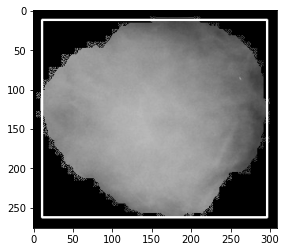

In [ ]:
i=1
path = root + data["fullPath"][i]#2499 2 205
path = path.replace('\\', '/')
path = path.replace('.png', '.jpg')
img = cv2.imread(path, 0)
ini_img = img.copy()
grid_l = int(img.shape[0] * img.shape[0] / img.shape[1] / 600)
grid_w = int(img.shape[1] * img.shape[1] / img.shape[0] / 200)
if grid_l < 2:
  grid_l = 2
if grid_w < 2:
  grid_w = 2
# img = breast_snip(path, True)
# img = morphological_enhancement(img)
#   img = resize(img, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),mode='constant',  
#                                 preserve_range=True)
# img = contrast_streching(img)
# plt.imshow(img, cmap='gray')


# X_train[n] = img  #Fill empty X_train with values from img
Main_mask = np.zeros((ini_img.shape[0], ini_img.shape[1], 1), dtype=np.bool)
masks = []
rect = []
if data['Tumour_Contour'][i] != '-':
  masks.append(check_path(root + data['Tumour_Contour'][i]))
if data['Tumour_Contour2'][i] != '-':
  masks.append(check_path(root + data['Tumour_Contour2'][i]))
if pd.isnull(data["Tumour_Contour3"][i]) == False:
  masks.append(check_path(root + data['Tumour_Contour3'][i]))
if pd.isnull(data["Tumour_Contour4"][i]) == False:
  masks.append(check_path(root + data['Tumour_Contour4'][i]))
if pd.isnull(data["Tumour_Contour5"][i]) == False:
  masks.append(check_path(root + data['Tumour_Contour5'][i]))
if pd.isnull(data["Tumour_Contour6"][i]) == False:
  masks.append(check_path(root + data['Tumour_Contour6'][i]))
for mask in masks:
  mask_ = imread(mask)
  # mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',   preserve_range=True), axis=-1)

  ret,thresh = cv2.threshold(mask_, 0,255, cv2.THRESH_OTSU)
  contours, hier = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)                   
  if data["Status"][i] != 'Normal':
    for cnt in contours:      
      (x,y,w,h) = cv2.boundingRect(cnt)
      cv2.drawContours(mask_, [cnt], 0,(255, 0, 0),-1)
      
    # print( np.where(np.nonzero(np.squeeze(Main_mask))))
    # ini_img = ini_img * mask_
    ini_img[np.where(mask_==0)] = 0
    cv2.rectangle(ini_img,(x,y),(x+w,y+h),(255,0,0),2)
    xC = (x + x+w) / 2
    yC= (y + y+h) / 2
    print(w, h)
    print(xC, yC)
    
    plt.imshow(ini_img[int(y*0.99):int(1.01*(y+h)),int(x*0.99):int(1.01*(x+w))], 'gray')
    # img_mask[:,:,0][np.nonzero(Main_mask[:,:,2])] = 127
    # img_mask[:,:,2][np.nonzero(Main_mask[:,:,2])] = 255
  
  # Main_mask = np.maximum(Main_mask, mask_) 

 

  # print(len(contours))
#image = breast_snip(img)
# mammo_med_blurred = cv2.medianBlur(img, 3)
# global_threshold = 0  # from Nagi thesis. <<= para to tune!
# _, mammo_binary = cv2.threshold(mammo_med_blurred, global_threshold, 
#                                  maxval=255, type=cv2.THRESH_BINARY)
# mammo_breast_mask = select_largest_obj(mammo_binary)  # <<= para to tune!
# img = cv2.bitwise_and(image, mammo_breast_mask)


# img = cv2.equalizeHist(img)
# pect = pect_mask(img)
# img = final_mam(img, pect)
# fig,axes = subplots(1, 1)
# fig.set_size_inches([12, 9])
# #res = hstack((mammo_med_blurred, mammo_binary))
# axes[0].imshow(image, cmap='gray')
# axes[1].imshow(image, cmap='gray')

print(ini_img[y:y+h,x:x+w].shape[0], ini_img[y:y+h,x:x+w].shape[1])
print(grid_l, grid_w)

In [ ]:
len(df_)

In [ ]:
# import imquality.brisque as brisque
# import csv
# n = len(data)
# b = len(df_)+1
# n_bri = 0
# bri=0
# psnr = 0
# mse_ = 0
# ssim_ = 0

data_mean =0.
data_std =0.
for i in range(0, len(data)):
    path = root + data['fullPath'][i]  # 2499
    path = path.replace('\\', '/')
    path = path.replace('.png', '.jpg')
    # img.create(11, 2, CV_8UC1)
    # src = imread(your-file, CV_8UC1)
    img = cv2.imread(path, 0)
    img = np.array(img) / 255.0
    data_mean += np.mean(img)
    data_std += np.std(img)
data_mean = data_mean / num
data_std = data_std / num

# print("Computing var...")
# data_std = 0.
# for idx in range(len(pathDir)):
#     filename = pathDir[idx]
#     img = Image.open(os.path.join(filepath, filename)).convert('L').resize((512, 512))
#     img = np.array(img) / 255.0
#     data_std += np.std(img)

# data_std = data_std / num
print("mean:{}".format(data_mean))
print("std:{}".format(data_std))

# ini_img = img.copy()
# grid_l = int(img.shape[0] * img.shape[0] / img.shape[1] / 600)
# grid_w = int(img.shape[1] * img.shape[1] / img.shape[0] / 200)
# if grid_l < 2:
#     grid_l = 2
# if grid_w < 2:
#     grid_w = 2
# image = breast_snip(img)
# n_bri = n_bri + brisque.score(ini_img)
# bri = bri + brisque.score(image.copy())
# psnr = psnr + PSNR(ini_img, image.copy())
# mse_ = mse_ + ssim_mse(ini_img, image.copy())[0]
# ssim_ = ssim_ + ssim_mse(ini_img, image.copy())[1]

NameError: ignored

In [ ]:
columns = ['image']
Udf = pd.DataFrame(columns=columns)

In [ ]:
import cv2
import numpy as np
for i in range(0, len(data)):
    path = root + data['fullPath'][i]  # 2499
    path = path.replace('\\', '/')
    path = path.replace('.png', '.jpg')
    # img.create(11, 2, CV_8UC1)
    # src = imread(your-file, CV_8UC1)
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:,:,0] = gray
    img2[:,:,1] = gray
    img2[:,:,2] = gray
    cv2.imwrite('/content/drive/MyDrive/Thesis/pos/3ux/' + str(i) + '.jpg', img2)
    # df_.loc[i] = '/content/drive/MyDrive/Thesis/pos/3ux/' + str(i) + '.jpg'   

In [ ]:
for i in range(0, len(data)):

    Udf.loc[i]  = '/content/drive/MyDrive/Thesis/pos/3ux/' + str(i) + '.jpg'

In [ ]:
import cv2
import numpy as np
for i in range(0, len(dfc_)):
    # path = root + data['fullPath'][i]  # 2499
    # path = path.replace('\\', '/')
    # path = path.replace('.png', '.jpg')
    # img.create(11, 2, CV_8UC1)
    # src = imread(your-file, CV_8UC1)
    img = cv2.imread(dfc_['image'][i])
    img = resize(img, (img.shape[0], IMG_WIDTH, IMG_CHANNELS),mode='constant',   preserve_range=True)
    cv2.imwrite('/content/drive/MyDrive/Thesis/pos/3x_/' + str(i) + '.jpg', img2)
    # df_.loc[i] = '/content/drive/MyDrive/Thesis/pos/3x_/' + str(i) + '.jpg' 

In [ ]:
columns = ['image', 'label']
dfc3_ = pd.DataFrame(columns=columns)

In [ ]:
import cv2
import numpy as np
for i in range(0, len(dfc_)):
    # path = root + data['fullPath'][i]  # 2499
    # path = path.replace('\\', '/')
    # path = path.replace('.png', '.jpg')
    # img.create(11, 2, CV_8UC1)
    # src = imread(your-file, CV_8UC1)
    dfc3_.loc[i] = ['/content/drive/MyDrive/Thesis/pos/3x_/' + str(i) + '.jpg', dfc_['label']]
     

In [ ]:
columns = ['image', 'mask', 'label']
df3_ = pd.DataFrame(columns=columns)

In [ ]:
import cv2
import numpy as np
for i in range(0, len(df_)):
    # path = root + data['fullPath'][i]  # 2499
    # path = path.replace('\\', '/')
    # path = path.replace('.png', '.jpg')
    # img.create(11, 2, CV_8UC1)
    # src = imread(your-file, CV_8UC1)
    # try:
    img = cv2.imread(df_['image'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # except:
    #   path = root + data['fullPath'][i]  # 2499
    #   path = path.replace('\\', '/')
    #   path = path.replace('.png', '.jpg')
    #   img = cv2.imread(path)
    #   img = breast_snip(img)
    #   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:,:,0] = gray
    img2[:,:,1] = gray
    img2[:,:,2] = gray
    cv2.imwrite('/content/drive/MyDrive/Thesis/pos/3x/' + str(i) + '.jpg', img2)
    # df_.loc[i] = '/content/drive/MyDrive/Thesis/pos/3x/' + str(i) + '.jpg' 

KeyboardInterrupt: ignored

In [ ]:
data_mean = data_mean / len(data)
data_std = data_std / len(data)
print("mean:{}".format(data_mean))
print("std:{}".format(data_std))

mean:0.21527170462444334
std:0.21957276726846967


In [ ]:
print(n_bri,bri,psnr, mse_, ssim_)

90.19495708272595 116.5157314455752 29.599896404114148 2950.9106240720957 0.45908368626292406


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


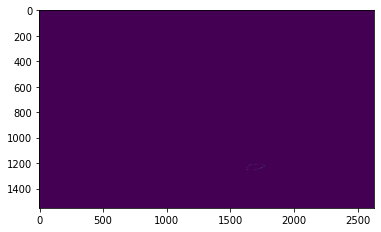

In [ ]:
  
# Import writer class from csv module
#!/usr/bin/python
# -*- coding: utf-8 -*-'
# j=0
for i in range(0, len(data)):

    try:
        path = root + data['fullPath'][i]  # 2499
        path = path.replace('\\', '/')
        path = path.replace('.png', '.jpg')
        img = cv2.imread(path, 0)
        ini_img = img.copy()
        grid_l = int(img.shape[0] * img.shape[0] / img.shape[1] / 600)
        grid_w = int(img.shape[1] * img.shape[1] / img.shape[0] / 200)
        if grid_l < 2:
            grid_l = 2
        if grid_w < 2:
            grid_w = 2
        image = breast_snip(img)
        mask_add(image, data, i)
        # n_bri = n_bri + brisque.score(ini_img)
        # bri = bri + brisque.score(image.copy())
        # psnr = psnr + PSNR(ini_img, image.copy())
        # mse_ = mse_ + ssim_mse(ini_img, image.copy())[0]
        # ssim_ = ssim_ + ssim_mse(ini_img, image.copy())[1]
        save_i = '/content/drive/MyDrive/Thesis/pos/x/' + str(i) \
            + '.jpg'
        cv2.imwrite(save_i, image)
        save_i = '/content/drive/MyDrive/Thesis/pos/x/' + str(i) + '.jpg'
        save_m = '/content/drive/MyDrive/Thesis/pos/y/' + str(i) + '.jpg'
        List = [save_i, save_m, data['Status'][i], data['fullPath'][i]]
        df_.loc[i] = List

    except: 
        df_.to_csv('/content/drive/MyDrive/Thesis/pos/data_p.csv', index = False)
        dfc_.to_csv('/content/drive/MyDrive/Thesis/pos/data_c.csv', index = False)
    # print(i)
    
df_.to_csv('/content/drive/MyDrive/Thesis/pos/data_p.csv', index = False)
dfc_.to_csv('/content/drive/MyDrive/Thesis/pos/data_c.csv', index = False)
      # List

    #     List = [save_i, save_m, data['Status'][i], data['fullPath'][i]]
    #     # df_.loc[i] = List
    #     writer.writerow(List)
    #     print(i, n)
    # except:
    #   continue




  # plt.imshow(image, cmap='gray')
  # print(img.shape[0], img.shape[1])
  # print(grid_l, grid_w)


In [ ]:
len(df_)

5238

In [ ]:
len(df_.loc[df_.label == 'Cancer'])

1428

In [ ]:
len(dfc_.loc[dfc_.label == 'Cancer'])

1609

In [ ]:
import imquality.brisque as brisque
import csv
n = len(data)
b = len(df_)+1
n_bri = 0
bri=0
psnr = 0
mse_ = 0
ssim_ = 0
for i in range(0, len(data)):
    path = root + data['fullPath'][0]  # 2499
    path = path.replace('\\', '/')
    path = path.replace('.png', '.jpg')
    # img.create(11, 2, CV_8UC1)
    # src = imread(your-file, CV_8UC1)
    img = cv2.imread(path, 0)

    ini_img = img.copy()
    grid_l = int(img.shape[0] * img.shape[0] / img.shape[1] / 600)
    grid_w = int(img.shape[1] * img.shape[1] / img.shape[0] / 200)
    if grid_l < 2:
        grid_l = 2
    if grid_w < 2:
        grid_w = 2
    image = breast_snip(img)
    n_bri = n_bri + brisque.score(ini_img)
    bri = bri + brisque.score(image.copy())
    psnr = psnr + PSNR(ini_img, image.copy())
    mse_ = mse_ + ssim_mse(ini_img, image.copy())[0]
    ssim_ = ssim_ + ssim_mse(ini_img, image.copy())[1]

In [ ]:
for i in range(0, len(data)): 
  path = root + data["fullPath"][i]#2499
  path = path.replace('\\', '/')
  path = path.replace('.png', '.jpg')
  # img = breast_snip(path, True)
  # img = morphological_enhancement(img)
  #   img = resize(img, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),mode='constant',  
  #                                 preserve_range=True)
  # img = contrast_streching(img)
  img = clahe(img)
  # X_train[n] = img  #Fill empty X_train with values from img
  img = resize(img, (img.shape[0], img.shape[1], IMG_CHANNELS),mode='constant', preserve_range=True)
  Main_mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
  masks = []

  if data['Tumour_Contour'][i] != '-':
    masks.append(check_path(root + data['Tumour_Contour'][i]))
  if data['Tumour_Contour2'][i] != '-':
    masks.append(check_path(root + data['Tumour_Contour2'][i]))
  if pd.isnull(data["Tumour_Contour3"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour3'][i]))
  if pd.isnull(data["Tumour_Contour4"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour4'][i]))
  if pd.isnull(data["Tumour_Contour5"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour5'][i]))
  if pd.isnull(data["Tumour_Contour6"][i]) == False:
    masks.append(check_path(root + data['Tumour_Contour6'][i]))
  for mask in masks:
    mask_ = imread(mask)
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                  preserve_range=True), axis=-1)
    Main_mask = np.maximum(Main_mask, mask_) 

# EfficientUnet

## Efficientnet

In [ ]:
#@title Efficientnet
from keras import models, layers
# import sys  
# sys.path.insert(0, '/content/drive/MyDrive/Thesis/MPL/EfficientUnet/efficientunet')
from tensorflow.keras.utils import get_file
# from utils import *

__all__ = ['get_model_by_name', 'get_efficientnet_b0_encoder', 'get_efficientnet_b1_encoder',
           'get_efficientnet_b2_encoder', 'get_efficientnet_b3_encoder', 'get_efficientnet_b4_encoder',
           'get_efficientnet_b5_encoder', 'get_efficientnet_b6_encoder', 'get_efficientnet_b7_encoder']


def _efficientnet(input_shape, blocks_args_list, global_params):
    batch_norm_momentum = global_params.batch_norm_momentum
    batch_norm_epsilon = global_params.batch_norm_epsilon

    # Stem part
    model_input = layers.Input(shape=input_shape)
    x = layers.Conv2D(
        filters=round_filters(32, global_params),
        kernel_size=[3, 3],
        strides=[2, 2],
        kernel_initializer=conv_kernel_initializer,
        padding='same',
        use_bias=False,
        name='stem_conv2d'
    )(model_input)

    x = layers.BatchNormalization(
        momentum=batch_norm_momentum,
        epsilon=batch_norm_epsilon,
        name='stem_batch_norm'
    )(x)

    x = Swish(name='stem_swish')(x)

    # Blocks part
    idx = 0
    drop_rate = global_params.drop_connect_rate
    n_blocks = sum([blocks_args.num_repeat for blocks_args in blocks_args_list])
    drop_rate_dx = drop_rate / n_blocks

    for blocks_args in blocks_args_list:
        assert blocks_args.num_repeat > 0
        # Update block input and output filters based on depth multiplier.
        blocks_args = blocks_args._replace(
            input_filters=round_filters(blocks_args.input_filters, global_params),
            output_filters=round_filters(blocks_args.output_filters, global_params),
            num_repeat=round_repeats(blocks_args.num_repeat, global_params)
        )

        # The first block needs to take care of stride and filter size increase.
        x = MBConvBlock(blocks_args, global_params, idx, drop_connect_rate=drop_rate_dx * idx)(x)
        idx += 1

        if blocks_args.num_repeat > 1:
            blocks_args = blocks_args._replace(input_filters=blocks_args.output_filters, strides=[1, 1])

        for _ in range(blocks_args.num_repeat - 1):
            x = MBConvBlock(blocks_args, global_params, idx, drop_connect_rate=drop_rate_dx * idx)(x)
            idx += 1

    # Head part
    x = layers.Conv2D(
        filters=round_filters(1280, global_params),
        kernel_size=[1, 1],
        strides=[1, 1],
        kernel_initializer=conv_kernel_initializer,
        padding='same',
        use_bias=False,
        name='head_conv2d'
    )(x)

    x = layers.BatchNormalization(
        momentum=batch_norm_momentum,
        epsilon=batch_norm_epsilon,
        name='head_batch_norm'
    )(x)

    x = Swish(name='head_swish')(x)

    x = layers.GlobalAveragePooling2D(name='global_average_pooling2d')(x)

    if global_params.dropout_rate > 0:
        x = layers.Dropout(global_params.dropout_rate)(x)

    x = layers.Dense(
        global_params.num_classes,
        kernel_initializer=dense_kernel_initializer,
        activation='softmax',
        name='head_dense'
    )(x)

    model = models.Model(model_input, x)

    return model


def get_model_by_name(model_name, input_shape, classes=3, pretrained=False):
    """Get an EfficientNet model by its name.
    """
    blocks_args, global_params = get_efficientnet_params(model_name, override_params={'num_classes': classes})
    model = _efficientnet(input_shape, blocks_args, global_params)

    try:
        if pretrained:
            weights = IMAGENET_WEIGHTS[model_name]
            weights_path = get_file(
                weights['name'],
                weights['url'],
                cache_subdir='models',
                md5_hash=weights['md5'],
            )
            model.load_weights(weights_path)
    except KeyError as e:
        print("NOTE: Currently model {} doesn't have pretrained weights, therefore a model with randomly initialized"
              " weights is returned.".format(e))

    return model


def _get_efficientnet_encoder(model_name, input_shape, pretrained=False):
    model = get_model_by_name(model_name, input_shape, pretrained=pretrained)
    encoder = models.Model(model.input, model.get_layer('global_average_pooling2d').output)
    encoder.layers.pop()  # remove GAP layer
    return encoder


def get_efficientnet_b0_encoder(input_shape, pretrained=False):
    return _get_efficientnet_encoder('efficientnet-b0', input_shape, pretrained=pretrained)


def get_efficientnet_b1_encoder(input_shape, pretrained=False):
    return _get_efficientnet_encoder('efficientnet-b1', input_shape, pretrained=pretrained)


def get_efficientnet_b2_encoder(input_shape, pretrained=False):
    return _get_efficientnet_encoder('efficientnet-b2', input_shape, pretrained=pretrained)


def get_efficientnet_b3_encoder(input_shape, pretrained=False):
    return _get_efficientnet_encoder('efficientnet-b3', input_shape, pretrained=pretrained)


def get_efficientnet_b4_encoder(input_shape, pretrained=False):
    return _get_efficientnet_encoder('efficientnet-b4', input_shape, pretrained=pretrained)


def get_efficientnet_b5_encoder(input_shape, pretrained=False):
    return _get_efficientnet_encoder('efficientnet-b5', input_shape, pretrained=pretrained)


def get_efficientnet_b6_encoder(input_shape, pretrained=False):
    return _get_efficientnet_encoder('efficientnet-b6', input_shape, pretrained=pretrained)


def get_efficientnet_b7_encoder(input_shape, pretrained=False):
    return _get_efficientnet_encoder('efficientnet-b7', input_shape, pretrained=pretrained)


## Utils

In [ ]:
#@title number of classes

n_classes=3 #@param {type:"integer"}

In [ ]:
#@title Utils
import re
from collections import namedtuple
from keras import layers
import keras.backend as K
import tensorflow as tf
import math
import numpy as np

GlobalParams = namedtuple('GlobalParams', ['batch_norm_momentum', 'batch_norm_epsilon', 'dropout_rate', 'num_classes',
                                           'width_coefficient', 'depth_coefficient', 'depth_divisor', 'min_depth',
                                           'drop_connect_rate'])
global_params = None
GlobalParams.__new__.__defaults__ = (None,) * len(GlobalParams._fields)

BlockArgs = namedtuple('BlockArgs', ['kernel_size', 'num_repeat', 'input_filters', 'output_filters', 'expand_ratio',
                                     'id_skip', 'strides', 'se_ratio'])
BlockArgs.__new__.__defaults__ = (None,) * len(BlockArgs._fields)

IMAGENET_WEIGHTS = {

    'efficientnet-b0': {
        'name': 'efficientnet-b0_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b0_imagenet_1000.h5',
        'md5': 'bca04d16b1b8a7c607b1152fe9261af7',
    },

    'efficientnet-b1': {
        'name': 'efficientnet-b1_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b1_imagenet_1000.h5',
        'md5': 'bd4a2b82f6f6bada74fc754553c464fc',
    },

    'efficientnet-b2': {
        'name': 'efficientnet-b2_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b2_imagenet_1000.h5',
        'md5': '45b28b26f15958bac270ab527a376999',
    },

    'efficientnet-b3': {
        'name': 'efficientnet-b3_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b3_imagenet_1000.h5',
        'md5': 'decd2c8a23971734f9d3f6b4053bf424',
    },

    'efficientnet-b4': {
        'name': 'efficientnet-b4_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b4_imagenet_1000.h5',
        'md5': '01df77157a86609530aeb4f1f9527949',
    },

    'efficientnet-b5': {
        'name': 'efficientnet-b5_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b5_imagenet_1000.h5',
        'md5': 'c31311a1a38b5111e14457145fccdf32',
    }

}


def round_filters(filters, global_params):
    """Round number of filters."""
    multiplier = global_params.width_coefficient
    divisor = global_params.depth_divisor
    min_depth = global_params.min_depth
    if not multiplier:
        return filters

    filters *= multiplier
    min_depth = min_depth or divisor
    new_filters = max(min_depth, int(filters + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_filters < 0.9 * filters:
        new_filters += divisor
    return int(new_filters)


def round_repeats(repeats, global_params):
    """Round number of repeats."""
    multiplier = global_params.depth_coefficient
    if not multiplier:
        return repeats
    return int(math.ceil(multiplier * repeats))


def get_efficientnet_params(model_name, override_params=None):
    """Get efficientnet params based on model name."""
    params_dict = {
        # (width_coefficient, depth_coefficient, resolution, dropout_rate)
        # Note: the resolution here is just for reference, its values won't be used.
        'efficientnet-b0': (1.0, 1.0, 224, 0.2),
        'efficientnet-b1': (1.0, 1.1, 240, 0.2),
        'efficientnet-b2': (1.1, 1.2, 260, 0.3),
        'efficientnet-b3': (1.2, 1.4, 300, 0.3),
        'efficientnet-b4': (1.4, 1.8, 380, 0.4),
        'efficientnet-b5': (1.6, 2.2, 456, 0.4),
        'efficientnet-b6': (1.8, 2.6, 528, 0.5),
        'efficientnet-b7': (2.0, 3.1, 600, 0.5),
    }
    if model_name not in params_dict.keys():
        raise KeyError('There is no model named {}.'.format(model_name))

    width_coefficient, depth_coefficient, _, dropout_rate = params_dict[model_name]

    blocks_args = [
        'r1_k3_s11_e1_i32_o16_se0.25', 'r2_k3_s22_e6_i16_o24_se0.25',
        'r2_k5_s22_e6_i24_o40_se0.25', 'r3_k3_s22_e6_i40_o80_se0.25',
        'r3_k5_s11_e6_i80_o112_se0.25', 'r4_k5_s22_e6_i112_o192_se0.25',
        'r1_k3_s11_e6_i192_o320_se0.25',
    ]
    global_params = GlobalParams(
        batch_norm_momentum=0.99,
        batch_norm_epsilon=1e-3,
        dropout_rate=dropout_rate,
        drop_connect_rate=0.2,
        num_classes=n_classes,
        width_coefficient=width_coefficient,
        depth_coefficient=depth_coefficient,
        depth_divisor=8,
        min_depth=None)

    if override_params:
        global_params = global_params._replace(**override_params)

    decoder = BlockDecoder()
    return decoder.decode(blocks_args), global_params


class BlockDecoder(object):
    """Block Decoder for readability."""

    @staticmethod
    def _decode_block_string(block_string):
        """Gets a block through a string notation of arguments."""
        assert isinstance(block_string, str)
        ops = block_string.split('_')
        options = {}
        for op in ops:
            splits = re.split(r'(\d.*)', op)
            if len(splits) >= 2:
                key, value = splits[:2]
                options[key] = value

        if 's' not in options or len(options['s']) != 2:
            raise ValueError('Strides options should be a pair of integers.')

        return BlockArgs(
            kernel_size=int(options['k']),
            num_repeat=int(options['r']),
            input_filters=int(options['i']),
            output_filters=int(options['o']),
            expand_ratio=int(options['e']),
            id_skip=('noskip' not in block_string),
            se_ratio=float(options['se']) if 'se' in options else None,
            strides=[int(options['s'][0]), int(options['s'][1])]
        )

    @staticmethod
    def _encode_block_string(block):
        """Encodes a block to a string."""
        args = [
            'r%d' % block.num_repeat,
            'k%d' % block.kernel_size,
            's%d%d' % (block.strides[0], block.strides[1]),
            'e%s' % block.expand_ratio,
            'i%d' % block.input_filters,
            'o%d' % block.output_filters
        ]
        if 0 < block.se_ratio <= 1:
            args.append('se%s' % block.se_ratio)
        if block.id_skip is False:
            args.append('noskip')
        return '_'.join(args)

    def decode(self, string_list):
        """Decodes a list of string notations to specify blocks inside the network.
        Args:
          string_list: a list of strings, each string is a notation of block.
        Returns:
          A list of namedtuples to represent blocks arguments.
        """
        assert isinstance(string_list, list)
        blocks_args = []
        for block_string in string_list:
            blocks_args.append(self._decode_block_string(block_string))
        return blocks_args

    def encode(self, blocks_args):
        """Encodes a list of Blocks to a list of strings.
        Args:
          blocks_args: A list of namedtuples to represent blocks arguments.
        Returns:
          a list of strings, each string is a notation of block.
        """
        block_strings = []
        for block in blocks_args:
            block_strings.append(self._encode_block_string(block))
        return block_strings


class Swish(layers.Layer):
    def __init__(self, name=None, **kwargs):
        super().__init__(name=name, **kwargs)

    def call(self, inputs, **kwargs):
        return tf.nn.silu(inputs)#tf.nn.swish I have changed this why I don't know yet

    def get_config(self):
        config = super().get_config()
        config['name'] = self.name
        return config


def SEBlock(block_args, **kwargs):
    num_reduced_filters = max(
        1, int(block_args.input_filters * block_args.se_ratio))
    filters = block_args.input_filters * block_args.expand_ratio

    spatial_dims = [1, 2]

    try:
        block_name = kwargs['block_name']
    except KeyError:
        block_name = ''

    def block(inputs):
        x = inputs
        x = layers.Lambda(lambda a: K.mean(a, axis=spatial_dims, keepdims=True))(x)
        x = layers.Conv2D(
            num_reduced_filters,
            kernel_size=[1, 1],
            strides=[1, 1],
            kernel_initializer=conv_kernel_initializer,
            padding='same',
            name=block_name + 'se_reduce_conv2d',
            use_bias=True
        )(x)

        x = Swish(name=block_name + 'se_swish')(x)

        x = layers.Conv2D(
            filters,
            kernel_size=[1, 1],
            strides=[1, 1],
            kernel_initializer=conv_kernel_initializer,
            padding='same',
            name=block_name + 'se_expand_conv2d',
            use_bias=True
        )(x)

        x = layers.Activation('sigmoid')(x)
        out = layers.Multiply()([x, inputs])
        return out

    return block


class DropConnect(layers.Layer):

    def __init__(self, drop_connect_rate, **kwargs):
        super().__init__(**kwargs)
        self.drop_connect_rate = drop_connect_rate

    def call(self, inputs, **kwargs):
        def drop_connect():
            keep_prob = 1.0 - self.drop_connect_rate

            # Compute drop_connect tensor
            batch_size = tf.shape(inputs)[0]
            random_tensor = keep_prob
            random_tensor += tf.random.uniform([batch_size, 1, 1, 1], dtype=inputs.dtype)
            binary_tensor = tf.floor(random_tensor)
            output = tf.math.divide(inputs, keep_prob) * binary_tensor
            return output

        return K.in_train_phase(drop_connect(), inputs, training=None)

    def get_config(self):
        config = super().get_config()
        config['drop_connect_rate'] = self.drop_connect_rate
        return config


def conv_kernel_initializer(shape, dtype=K.floatx()):
    """Initialization for convolutional kernels.
    The main difference with tf.variance_scaling_initializer is that
    tf.variance_scaling_initializer uses a truncated normal with an uncorrected
    standard deviation, whereas here we use a normal distribution. Similarly,
    tf.contrib.layers.variance_scaling_initializer uses a truncated normal with
    a corrected standard deviation.
    Args:
        shape: shape of variable
        dtype: dtype of variable
    Returns:
        an initialization for the variable
    """
    kernel_height, kernel_width, _, out_filters = shape
    fan_out = int(kernel_height * kernel_width * out_filters)
    return tf.random.normal(
        shape, mean=0.0, stddev=np.sqrt(2.0 / fan_out), dtype=dtype)


def dense_kernel_initializer(shape, dtype=K.floatx()):
    init_range = 1.0 / np.sqrt(shape[1])
    return tf.random.uniform(shape, -init_range, init_range, dtype=dtype)


def MBConvBlock(block_args, global_params, idx, drop_connect_rate=None):
    filters = block_args.input_filters * block_args.expand_ratio
    batch_norm_momentum = global_params.batch_norm_momentum
    batch_norm_epsilon = global_params.batch_norm_epsilon
    has_se = (block_args.se_ratio is not None) and (0 < block_args.se_ratio <= 1)

    block_name = 'blocks_' + str(idx) + '_'

    def block(inputs):
        x = inputs

        # Expansion phase
        if block_args.expand_ratio != 1:
            expand_conv = layers.Conv2D(filters,
                                        kernel_size=[1, 1],
                                        strides=[1, 1],
                                        kernel_initializer=conv_kernel_initializer,
                                        padding='same',
                                        use_bias=False,
                                        name=block_name + 'expansion_conv2d'
                                        )(x)
            bn0 = layers.BatchNormalization(momentum=batch_norm_momentum,
                                            epsilon=batch_norm_epsilon,
                                            name=block_name + 'expansion_batch_norm')(expand_conv)

            x = Swish(name=block_name + 'expansion_swish')(bn0)

        # Depth-wise convolution phase
        kernel_size = block_args.kernel_size
        depthwise_conv = layers.DepthwiseConv2D(
            [kernel_size, kernel_size],
            strides=block_args.strides,
            depthwise_initializer=conv_kernel_initializer,
            padding='same',
            use_bias=False,
            name=block_name + 'depthwise_conv2d'
        )(x)
        bn1 = layers.BatchNormalization(momentum=batch_norm_momentum,
                                        epsilon=batch_norm_epsilon,
                                        name=block_name + 'depthwise_batch_norm'
                                        )(depthwise_conv)
        x = Swish(name=block_name + 'depthwise_swish')(bn1)

        if has_se:
            x = SEBlock(block_args, block_name=block_name)(x)

        # Output phase
        project_conv = layers.Conv2D(
            block_args.output_filters,
            kernel_size=[1, 1],
            strides=[1, 1],
            kernel_initializer=conv_kernel_initializer,
            padding='same',
            name=block_name + 'output_conv2d',
            use_bias=False)(x)
        x = layers.BatchNormalization(momentum=batch_norm_momentum,
                                      epsilon=batch_norm_epsilon,
                                      name=block_name + 'output_batch_norm'
                                      )(project_conv)
        if block_args.id_skip:
            if all(
                    s == 1 for s in block_args.strides
            ) and block_args.input_filters == block_args.output_filters:
                # only apply drop_connect if skip presents.
                if drop_connect_rate:
                    x = DropConnect(drop_connect_rate)(x)
                x = layers.add([x, inputs])

        return x

    return block


def freeze_efficientunet_first_n_blocks(model, n):
    mbblock_nr = 0
    while True:
        try:
            model.get_layer('blocks_{}_output_batch_norm'.format(mbblock_nr))
            mbblock_nr += 1
        except ValueError:
            break

    all_block_names = ['blocks_{}_output_batch_norm'.format(i) for i in range(mbblock_nr)]
    all_block_index = []
    for idx, layer in enumerate(model.layers):
        if layer.name == all_block_names[0]:
            all_block_index.append(idx)
            all_block_names.pop(0)
            if len(all_block_names) == 0:
                break
    n_blocks = len(all_block_index)

    if n <= 0:
        print('n is less than or equal to 0, therefore no layer will be frozen.')
        return
    if n > n_blocks:
        raise ValueError("There are {} blocks in total, n cannot be greater than {}.".format(n_blocks, n_blocks))

    idx_of_last_block_to_be_frozen = all_block_index[n - 1]
    for layer in model.layers[:idx_of_last_block_to_be_frozen + 1]:
        layer.trainable = False


def unfreeze_efficientunet(model):
    for layer in model.layers:
        layer.trainable = True


## *Efficientunet*

In [ ]:
#@markdown Efficientnet-unet
import sys  
# sys.path.insert(0, '/content/drive/MyDrive/Thesis/MPL/EfficientUnet/efficientunet')
from keras.layers import *
from keras import models
# from efficientnet import *
# from utils import conv_kernel_initializer


__all__ = ['get_efficient_unet_b0', 'get_efficient_unet_b1', 'get_efficient_unet_b2', 'get_efficient_unet_b3',
           'get_efficient_unet_b4', 'get_efficient_unet_b5', 'get_efficient_unet_b6', 'get_efficient_unet_b7',
           'get_blocknr_of_skip_candidates']


def get_blocknr_of_skip_candidates(encoder, verbose=False):
    """
    Get block numbers of the blocks which will be used for concatenation in the Unet.
    :param encoder: the encoder
    :param verbose: if set to True, the shape information of all blocks will be printed in the console
    :return: a list of block numbers
    """
    shapes = []
    candidates = []
    mbblock_nr = 0
    while True:
        try:
            mbblock = encoder.get_layer('blocks_{}_output_batch_norm'.format(mbblock_nr)).output
            shape = int(mbblock.shape[1]), int(mbblock.shape[2])
            if shape not in shapes:
                shapes.append(shape)
                candidates.append(mbblock_nr)
            if verbose:
                print('blocks_{}_output_shape: {}'.format(mbblock_nr, shape))
            mbblock_nr += 1
        except ValueError:
            break
    return candidates


def DoubleConv(filters, kernel_size, initializer='glorot_uniform'):

    def layer(x):

        x = Conv2D(filters, kernel_size, padding='same', use_bias=False, kernel_initializer=initializer)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(filters, kernel_size, padding='same', use_bias=False, kernel_initializer=initializer)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        return x

    return layer


def UpSampling2D_block(filters, kernel_size=(3, 3), upsample_rate=(2, 2), interpolation='bilinear',
                       initializer='glorot_uniform', skip=None):
    def layer(input_tensor):

        x = UpSampling2D(size=upsample_rate, interpolation=interpolation)(input_tensor)

        if skip is not None:
            x = Concatenate()([x, skip])

        x = DoubleConv(filters, kernel_size, initializer=initializer)(x)

        return x
    return layer


def Conv2DTranspose_block(filters, kernel_size=(3, 3), transpose_kernel_size=(2, 2), upsample_rate=(2, 2),
                          initializer='glorot_uniform', skip=None):
    def layer(input_tensor):

        x = Conv2DTranspose(filters, transpose_kernel_size, strides=upsample_rate, padding='same')(input_tensor)

        if skip is not None:
            x = Concatenate()([x, skip])

        x = DoubleConv(filters, kernel_size, initializer=initializer)(x)

        return x

    return layer


# noinspection PyTypeChecker
def _get_efficient_unet(encoder, out_channels=2, block_type='upsampling', concat_input=True):
    MBConvBlocks = []

    skip_candidates = get_blocknr_of_skip_candidates(encoder)

    for mbblock_nr in skip_candidates:
        mbblock = encoder.get_layer('blocks_{}_output_batch_norm'.format(mbblock_nr)).output
        MBConvBlocks.append(mbblock)

    # delete the last block since it won't be used in the process of concatenation
    MBConvBlocks.pop()

    input_ = encoder.input
    head = encoder.get_layer('head_swish').output
    blocks = [input_] + MBConvBlocks + [head]

    if block_type == 'upsampling':
        UpBlock = UpSampling2D_block
    else:
        UpBlock = Conv2DTranspose_block

    o = blocks.pop()
    o = UpBlock(512, initializer=conv_kernel_initializer, skip=blocks.pop())(o)
    o = UpBlock(256, initializer=conv_kernel_initializer, skip=blocks.pop())(o)
    o = UpBlock(128, initializer=conv_kernel_initializer, skip=blocks.pop())(o)
    o = UpBlock(64, initializer=conv_kernel_initializer, skip=blocks.pop())(o)
    if concat_input:
        o = UpBlock(32, initializer=conv_kernel_initializer, skip=blocks.pop())(o)
    else:
        o = UpBlock(32, initializer=conv_kernel_initializer, skip=None)(o)
    o = Conv2D(out_channels, (1, 1), padding='same', kernel_initializer=conv_kernel_initializer)(o)

    model = models.Model(encoder.input, o)

    return model


def get_efficient_unet_b0(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B0 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B0 model
    """
    encoder = get_efficientnet_b0_encoder(input_shape, pretrained=pretrained)
    model = _get_efficient_unet(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model


def get_efficient_unet_b1(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B1 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B1 model
    """
    encoder = get_efficientnet_b1_encoder(input_shape, pretrained=pretrained)
    model = _get_efficient_unet(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model


def get_efficient_unet_b2(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B2 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B2 model
    """
    encoder = get_efficientnet_b2_encoder(input_shape, pretrained=pretrained)
    model = _get_efficient_unet(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model


def get_efficient_unet_b3(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B3 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B3 model
    """
    encoder = get_efficientnet_b3_encoder(input_shape, pretrained=pretrained)
    model = _get_efficient_unet(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model


def get_efficient_unet_b4(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B4 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B4 model
    """
    encoder = get_efficientnet_b4_encoder(input_shape, pretrained=pretrained)
    model = _get_efficient_unet(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model


def get_efficient_unet_b5(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B5 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B5 model
    """
    encoder = get_efficientnet_b5_encoder(input_shape, pretrained=pretrained)
    model = _get_efficient_unet(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model


def get_efficient_unet_b6(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B6 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B6 model
    """
    encoder = get_efficientnet_b6_encoder(input_shape, pretrained=pretrained)
    model = _get_efficient_unet(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model


def get_efficient_unet_b7(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B7 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B7 model
    """
    encoder = get_efficientnet_b7_encoder(input_shape, pretrained=pretrained)
    model = _get_efficient_unet(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model


## Create model

In [ ]:
Channels = 1 #@param {type:"integer"}
Img_size =224 #@param {type:"integer"}
input_shape = (Img_size, Img_size, Channels) 

In [ ]:
tf.keras.backend.clear_session()


In [ ]:
#@markdown Model Efficient unet

classifier =  get_efficientnet_b0_encoder((224, 224, 3), pretrained=False)
modelS = models.Sequential()
modelS.add(classifier)
modelS.add(layers.Dense(3))
modelS.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 1280)              4049564   
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 4,053,407
Trainable params: 4,011,391
Non-trainable params: 42,016
_________________________________________________________________


In [ ]:
classifier_t =  get_efficientnet_b0_encoder((224,224, 3), pretrained=False)
modelT = models.Sequential()
modelT.add(classifier_t)
modelT.add(layers.Dense(3))
modelT.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Functional)         (None, 1280)              4049564   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3843      
Total params: 4,053,407
Trainable params: 4,011,391
Non-trainable params: 42,016
_________________________________________________________________


# Model

In [ ]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
get_available_gpus()    

In [ ]:
%cd /content/drive/MyDrive/Thesis/MPL

In [ ]:
#@title MPL config
import tensorflow as tf




# about dataset
IMG_SIZE = 224
BATCH_SIZE = 8
# LABEL_FILE_PATH = '/content/cifar/label4000.csv' # google
# UNLABEL_FILE_PATH = '/content/cifar/train.csv'

_MAX_LEVEL = 10
CUTOUT_CONST = 40.
TRANSLATE_CONST = 100.
REPLACE_COLOR = [128, 128, 128]


# LABEL_FILE_PATH = '../input/cifar10/cifar/label4000.csv'  # kaggle
# UNLABEL_FILE_PATH = '../input/cifar10/cifar/train.csv'


AUGMENT_MAGNITUDE = 8
SHUFFLE_SIZE = BATCH_SIZE * 16
DATA_LEN = 400  # 数据集的总长度

# about model
NUM_XLA_SHARDS = -1
BATCH_NORM_EPSILON = 1e-3
BATCH_NORM_DECAY = 0.999
DROPOUT_RATE = 0.
DROPOUT = 0.2
NUM_CLASSES = 3
NUM_CLASS = 3

# about training
LOG_EVERY = 20
SAVE_EVERY = 5
TEA_SAVE_PATH = '/content/drive/MyDrive/Thesis/weights/CT'
STD_SAVE_PATH = '/content/drive/MyDrive/Thesis/weights/CS'

MAX_EPOCHS = 1920
MAX_STEPS = MAX_EPOCHS * (int(DATA_LEN / BATCH_SIZE)-1)
UDA_WEIGHT = 8  # uda的权重
UDA_STEPS = 2000
TEST_EVERY = 2
GRAD_BOUND = 1e9
EMA = 0.995


# continue train
TEA_CONTINUE = False
STD_CONTINUE = False
TEA_LOAD_PATH = '/content/drive/MyDrive/Thesis/CTweights'
STD_LOAD_PATH = '/content/drive/MyDrive/Thesis/CTweights'
CONTINUE_EPOCH = 885


# about testing
# TEST_FILE_PATH = '/content/cifar/test.csv'
# TEST_FILE_PATH = '../input/cifar10/cifar/test.csv'
TEST_MODEL_PATH = '/content/drive/MyDrive/Thesis/weights/CS'

# about UdaCrossEntroy
UDA_DATA = 1
LABEL_SMOOTHING = 0.15
UDA_TEMP = 0.7
UDA_THRESHOLD = 0.6

# about learning rate
STUDENT_LR = 0.0005  # student
STUDENT_LR_WARMUP_STEPS = 4000
STUDENT_LR_WAIT_STEPS = 2000
TEACHER_LR = 0.0005  # teacher
TEACHER_LR_WARMUP_STEPS = 1000
TEACHER_NUM_WAIT_STEPS = 0

LR_DECAY_TYPE = 'cosine'  # constant, exponential, cosine
NUM_DECAY_STEPS = 300
LR_DECAY_RATE = 0.97

# about optimizer
OPTIM_TYPE = 'sgd'  # sgd, momentum, rmsprop
WEIGHT_DECAY = 5e-4


# dtype
DTYPE = tf.float32

In [ ]:
#@title Self_aug_func
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import matplotlib.pyplot as plt
import math
import tensorflow_addons.image as image_ops

# import 


def autocontrast(image):
    lo = tf.cast(tf.reduce_min(image, axis=[0, 1]), tf.float32)
    hi = tf.cast(tf.reduce_max(image, axis=[0, 1]), tf.float32)
    scale = tf.math.divide(255.0, (hi - lo))
    offset = tf.math.multiply(-lo, scale)
    image = tf.math.add(
        tf.math.multiply(tf.cast(image, tf.float32), scale),
        offset
    )
    image = tf.clip_by_value(image, 0.0, 255.0)
    image = tf.cast(image, tf.uint8)
    return image


def equalize(image):
    # image = tf.cast(image, tf.int32)
    # channel = tf.shape(image)[-1]
    # for i in range(channel):
    #     im = tf.cast(image[:, :, i], tf.int32)
    #     histo = tf.histogram_fixed_width(im, [0, 255], nbins=256)
    #     nonzero = tf.where(tf.not_equal(histo, 0))
    #     nonzero_histo = tf.reshape(tf.gather(histo, nonzero), [-1])
    #     step = (tf.reduce_sum(nonzero_histo) - nonzero_histo[-1]) // 255
    #     print(step)
    #     if step == 0:
    #         pass
    #     else:
    #         lut = (tf.cumsum(histo) + (step // 2)) // step
    #         lut = tf.concat([[0], lut[:-1]], 0)
    #         lut = tf.clip_by_value(lut, 0, 255)
    #         # print(lut)
    #         image[:, :, i] = tf.gather(lut, image[:, :, i])
    #         # image[:, :, i] = im
    #     # image[:, :, i] = im

    def scale_channel(im, c=0):
        """Scale the data in the channel to implement equalize."""
        im = tf.cast(im[:, :, 0], tf.int32)
        # Compute the histogram of the image channel.
        histo = tf.histogram_fixed_width(im, [0, 255], nbins=256)

        # For the purposes of computing the step, filter out the nonzeros.
        nonzero = tf.where(tf.not_equal(histo, 0))
        nonzero_histo = tf.reshape(tf.gather(histo, nonzero), [-1])
        step = (tf.reduce_sum(nonzero_histo) - nonzero_histo[-1]) // 255

        def build_lut(histo, step):
            # Compute the cumulative sum, shifting by step // 2
            # and then normalization by step.
            lut = (tf.cumsum(histo) + (step // 2)) // step
            # Shift lut, prepending with 0.
            lut = tf.concat([[0], lut[:-1]], 0)
            # Clip the counts to be in range.  This is done
            # in the C code for image.point.
            return tf.clip_by_value(lut, 0, 255)

        # If step is zero, return the original image.  Otherwise, build
        # lut from the full histogram and step and then index from it.
        result = tf.cond(tf.equal(step, 0),
                         lambda: im,
                         lambda: tf.gather(build_lut(histo, step), im))
        return tf.cast(result, tf.uint8)

    s1 = scale_channel(image, 0)
    s2 = scale_channel(image, 1)
    s3 = scale_channel(image, 2)
    image = tf.stack([s1, s2, s3], 2)

    return image


def invert(image):
    image = 255 - image
    return image


def rotate(image):
    level = tf.convert_to_tensor((AUGMENT_MAGNITUDE / _MAX_LEVEL) * 30, tf.float32)
    should_filp = tf.cast(
        tf.floor(tf.random.uniform([]) + 0.5),
        tf.bool
    )
    degree = tf.cond(should_filp, lambda: level, lambda: -level)
    degree_to_radians = tf.convert_to_tensor(math.pi / 180., tf.float32)
    radians = tf.math.multiply(degree, degree_to_radians)
    new_imgsize = tf.cast(tf.math.abs(tf.divide(IMG_SIZE, radians)), tf.int32)
    image = tf.image.resize(image, (new_imgsize, new_imgsize))
    image = image_ops.rotate(image, radians, fill_mode='constant')
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE, IMG_SIZE)
    image = tf.cast(image, tf.uint8)
    return image


def posterize(image):
    bit = tf.cast(tf.cast(AUGMENT_MAGNITUDE, tf.float32) / _MAX_LEVEL * 4, tf.float32)
    shift = tf.cast(8 - bit, image.dtype)
    image = tf.bitwise.right_shift(image, shift)
    image = tf.bitwise.left_shift(image, shift)
    return image


def solarize_arg(image):
    threahold = tf.cast(tf.cast(AUGMENT_MAGNITUDE, tf.float32) / _MAX_LEVEL * 22, tf.float32)
    threahold = tf.cast(threahold, image.dtype)
    image = tf.where(image < threahold, image, 255 - image)
    return image


def solarize_add(image, threahold=128):
    addition = tf.cast(tf.cast(AUGMENT_MAGNITUDE, tf.float32) / _MAX_LEVEL * 2, tf.int32)
    threahold = tf.cast(threahold, image.dtype)
    image = tf.add(tf.cast(image, tf.int32), addition)
    image = tf.cast(tf.clip_by_value(image, 0, 255), tf.uint8)
    image = tf.where(image < threahold, image, 255 - image)
    return image


def color(image, degenetate=None):
    if degenetate is None:
        degenerate = tf.image.grayscale_to_rgb(tf.image.rgb_to_grayscale(image))

    factor = tf.cast((AUGMENT_MAGNITUDE / _MAX_LEVEL) * 1.8 + 0.1, tf.float32)

    def _blend():
        degen = tf.image.convert_image_dtype(degenerate, tf.float32)
        img = tf.image.convert_image_dtype(image, tf.float32)
        output = degen + factor * (img - degen)
        output = tf.where(
            tf.logical_and(tf.less(0., factor), tf.less(factor, 1.)),
            x=output,
            y=tf.clip_by_value(output, 0., 255.)
        )
        return tf.image.convert_image_dtype(output, tf.uint8)

    pred_fn_pairs = [
        (tf.equal(factor, 0.), lambda: degenerate),
        (tf.equal(factor, 1.), lambda: image),
    ]
    image = tf.case(
        pred_fn_pairs=pred_fn_pairs,
        default=_blend,
        exclusive=True,
        strict=True,
    )
    return image


def contrast(image):
    degenerate = tf.image.rgb_to_grayscale(image)
    degenerate = tf.cast(degenerate, tf.int32)

    hist = tf.histogram_fixed_width(degenerate, [0, 255], nbins=256)
    mean = tf.reduce_sum(tf.cast(hist, tf.float32)) / 256.
    degenerate = tf.ones_like(degenerate, dtype=tf.float32) * mean
    degenerate = tf.clip_by_value(degenerate, 0., 255.)
    degenerate = tf.image.grayscale_to_rgb(tf.cast(degenerate, tf.uint8))

    factor = tf.cast((AUGMENT_MAGNITUDE / _MAX_LEVEL) * 0.6 + 0.1, tf.float32)

    def _blend():
        degen = tf.image.convert_image_dtype(degenerate, tf.float32)
        img = tf.image.convert_image_dtype(image, tf.float32)
        output = degen + factor * (img - degen)
        output = tf.where(
            tf.logical_and(tf.less(0., factor), tf.less(factor, 1.)),
            x=output,
            y=tf.clip_by_value(output, 0., 255.)
        )
        return tf.image.convert_image_dtype(output, tf.uint8)

    pred_fn_pairs = [
        (tf.equal(factor, 0.), lambda: degenerate),
        (tf.equal(factor, 1.), lambda: image),
    ]
    image = tf.case(
        pred_fn_pairs=pred_fn_pairs,
        default=_blend,
        exclusive=True,
        strict=True,
    )
    return image


def brightness(image):
    image = tf.image.adjust_brightness(image, 0.25)
    return image


def sharpness(image):
    factor = tf.cast((AUGMENT_MAGNITUDE / _MAX_LEVEL) * 1.6 + 0.1, tf.float32)
    image = tf.cast(image, tf.float32)
    image = image_ops.sharpness(image, factor)
    image = tf.cast(image, tf.uint8)
    return image


def shear_x(image):
    level = tf.convert_to_tensor((AUGMENT_MAGNITUDE / _MAX_LEVEL) * 0.2, tf.float32)
    should_filp = tf.cast(
        tf.floor(tf.random.uniform([]) + 0.5),
        tf.bool
    )
    level = tf.cond(should_filp, lambda: level, lambda: -level)

    new_size = tf.cast(IMG_SIZE * 1.2, dtype=tf.int32)
    image = tf.image.resize(image, (new_size, new_size))
    image = image_ops.shear_x(
        image,
        level,
        replace=tf.convert_to_tensor(REPLACE_COLOR, image.dtype)
    )
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE, IMG_SIZE)
    image = tf.cast(image, tf.uint8)
    return image


def shear_y(image):
    level = tf.convert_to_tensor((AUGMENT_MAGNITUDE / _MAX_LEVEL) * 0.2, tf.float32)
    should_filp = tf.cast(
        tf.floor(tf.random.uniform([]) + 0.5),
        tf.bool
    )
    level = tf.cond(should_filp, lambda: level, lambda: -level)

    new_size = tf.cast(IMG_SIZE * 1.1, dtype=tf.int32)
    image = tf.image.resize(image, (new_size, new_size))
    image = image_ops.shear_y(
        image,
        level,
        replace=tf.convert_to_tensor(REPLACE_COLOR, image.dtype)
    )
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE, IMG_SIZE)
    image = tf.cast(image, tf.uint8)
    return image


def translate_x(image):
    level = tf.convert_to_tensor(
        (AUGMENT_MAGNITUDE / _MAX_LEVEL) * float(TRANSLATE_CONST), tf.float32)
    should_flip = tf.cast(
        tf.floor(tf.random.uniform([]) + 0.5),
        tf.bool)  # 得到的结果为True和False
    pixels = tf.cond(should_flip, lambda: level, lambda: -level)
    image = image_ops.translate(image, [-pixels, 0])
    return image


def translate_y(image):
    level = tf.convert_to_tensor(
        (AUGMENT_MAGNITUDE / _MAX_LEVEL) * float(TRANSLATE_CONST), tf.float32)
    should_flip = tf.cast(
        tf.floor(tf.random.uniform([]) + 0.5),
        tf.bool)  # 得到的结果为True和False
    pixels = tf.cond(should_flip, lambda: level, lambda: -level)
    image = image_ops.translate(image, [0, -pixels])
    return image


def cutout(image):
    pad_size = tf.cast(
        tf.cast(AUGMENT_MAGNITUDE, tf.float32) / _MAX_LEVEL * CUTOUT_CONST,
        tf.int32
    )
    image_height = tf.shape(image)[0]
    image_width = tf.shape(image)[1]

    # Samples the center location in the image where the zero mask is applied.
    cutout_center_height = tf.random.uniform(
        shape=[], minval=0, maxval=image_height,
        dtype=tf.int32)

    cutout_center_width = tf.random.uniform(
        shape=[], minval=0, maxval=image_width,
        dtype=tf.int32)

    lower_pad = tf.maximum(0, cutout_center_height - pad_size)
    upper_pad = tf.maximum(0, image_height - cutout_center_height - pad_size)
    left_pad = tf.maximum(0, cutout_center_width - pad_size)
    right_pad = tf.maximum(0, image_width - cutout_center_width - pad_size)

    cutout_shape = [image_height - (lower_pad + upper_pad),
                    image_width - (left_pad + right_pad)]
    padding_dims = [[lower_pad, upper_pad], [left_pad, right_pad]]
    mask = tf.pad(
        tf.zeros(cutout_shape, dtype=image.dtype),
        padding_dims, constant_values=1)
    mask = tf.expand_dims(mask, -1)
    mask = tf.tile(mask, [1, 1, 3])
    image = tf.where(
        tf.equal(mask, 0),
        tf.ones_like(image, dtype=image.dtype) * REPLACE_COLOR,
        image)
    return image


def identity(image):
    return tf.identity(image)


In [ ]:
#@title Self_aug_util
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

# from self_aug_func import *

_MAX_LEVEL = 10



def _enhance_level_to_arg(level):
    return (tf.cast((level / _MAX_LEVEL) * 1.8 + 0.1, tf.float32),)


def _translate_level_to_arg(level, translate_const):
    level = tf.convert_to_tensor((level / _MAX_LEVEL) * float(translate_const), tf.float32)
    should_flip = tf.cast(
        tf.floor(tf.random.uniform([]) + 0.5),
        tf.bool)  # 得到的结果为True和False
    final_tensor = tf.cond(should_flip, lambda: level, lambda: -level)
    return final_tensor


def _rotate_level_to_arg(level):
    level = tf.convert_to_tensor((level / _MAX_LEVEL) * 30, tf.float32)
    should_filp = tf.cast(
        tf.floor(tf.random.uniform([]) + 0.5),
        tf.bool
    )
    final_tensor = tf.cond(should_filp, lambda: level, lambda: -level)
    return final_tensor


def _shear_level_to_arg(level):
    level = tf.convert_to_tensor((level / _MAX_LEVEL) * 0.3, tf.float32)
    should_filp = tf.cast(
        tf.floor(tf.random.uniform([]) + 0.5),
        tf.bool
    )
    final_tensor = tf.cond(should_filp, lambda: level, lambda: -level)
    return final_tensor


def level_to_arg(cutout_const, translate_const):
    '''
    将对image做变化的函数所用到的参数整理成字典形式
    :param cutout_const:
    :param translate_const:
    :return: type:dict
    '''
    no_arg = lambda level: ()
    posterize_arg = lambda level: tf.cast(
        tf.cast(level, tf.float32) / _MAX_LEVEL * 4,
        tf.float32
    )
    solarize_arg = lambda level: tf.cast(
        tf.cast(level, tf.float32) / _MAX_LEVEL * 256,
        tf.float32
    )
    solarize_add_arg = lambda level: tf.cast(
        tf.cast(level, tf.float32) / _MAX_LEVEL * 110,
        tf.float32
    )
    cutout_arg = lambda level: tf.cast(
        tf.cast(level, tf.float32) / _MAX_LEVEL * cutout_const,
        tf.float32
    )
    translate_arg = lambda level: _translate_level_to_arg(level, translate_const)

    args = {
        'Identity': no_arg,
        'AutoContrast': no_arg,
        'Equalize': no_arg,
        'Invert': no_arg,
        'Rotate': _rotate_level_to_arg,
        'Posterize': posterize_arg,
        'Solarize': solarize_arg,
        'SplarizeAdd': solarize_add_arg,
        'Color': _enhance_level_to_arg,
        'Contrast': _enhance_level_to_arg,
        'Brightness': _enhance_level_to_arg,
        'Sharpness': _enhance_level_to_arg,
        'ShearX': _shear_level_to_arg,
        'ShearY': _shear_level_to_arg,
        'Cutout': cutout_arg,
        'TranslateX': translate_arg,
        'TranslateY': translate_arg,
    }
    return args


if __name__ == '__main__':
    NAME_TO_FUNC = {
        'AutoContrast': autocontrast,
        'Equalize': equalize,
        'Invert': invert,
        'Rotate': rotate,
        'Posterize': posterize,
        'Solarize': solarize_arg,
        'SolarizeAdd': solarize_add,
        'Color': color,
        'Contrast': contrast,
        'Brightness': brightness,
        'Sharpness': sharpness,
        'ShearX': shear_x,
        'ShearY': shear_y,
        'TranslateX': translate_x,
        'TranslateY': translate_y,
        'Cutout': cutout,
        'Identity': identity,
    }

    available_ops = [
        'AutoContrast', 'Equalize', 'Invert', 'Rotate', 'Posterize',
        'Solarize', 'Color', 'Contrast', 'Brightness', 'Sharpness',
        'ShearX', 'ShearY', 'TranslateX', 'TranslateY', 'Cutout',
    ]

    for (i, op_name) in enumerate(available_ops):
        func = NAME_TO_FUNC[op_name]
        args = level_to_arg(4, 4)[op_name](16)
        print(args)


()
()
()
tf.Tensor(-48.0, shape=(), dtype=float32)
tf.Tensor(6.4, shape=(), dtype=float32)
tf.Tensor(409.6, shape=(), dtype=float32)
(<tf.Tensor: shape=(), dtype=float32, numpy=2.98>,)
(<tf.Tensor: shape=(), dtype=float32, numpy=2.98>,)
(<tf.Tensor: shape=(), dtype=float32, numpy=2.98>,)
(<tf.Tensor: shape=(), dtype=float32, numpy=2.98>,)
tf.Tensor(0.48, shape=(), dtype=float32)
tf.Tensor(-0.48, shape=(), dtype=float32)
tf.Tensor(-6.4, shape=(), dtype=float32)
tf.Tensor(6.4, shape=(), dtype=float32)
tf.Tensor(6.4, shape=(), dtype=float32)


In [ ]:
#@title Self_augment
'''
reference:
https://github.com/google-research/google-research/tree/1f1741a985a0f2e6264adae985bde664a7993bd2/flax_models/cifar/datasets
'''
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

'''
可能augment.py中的内容有问题 涉及文件augment.py的line 53，54
引用的库不一样，因为tensorflow.contrib已经停用，
使用的第三方：pip install tensorflow-addons
'''
import os


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings

warnings.filterwarnings("ignore")

import pandas as pd

# from self_aug_func import *

# 将对图片做augment的函数变成一个字典
NAME_TO_FUNC = {
    'AutoContrast': autocontrast,
    'Equalize': equalize,
    'Invert': invert,
    'Rotate': rotate,
    'Posterize': posterize,
    'Solarize': solarize_arg,
    'SolarizeAdd': solarize_add,
    'Color': color,
    'Contrast': contrast,
    'Brightness': brightness,
    'Sharpness': sharpness,
    'ShearX': shear_x,
    'ShearY': shear_y,
    'TranslateX': translate_x,
    'TranslateY': translate_y,
    'Cutout': cutout,
    'Identity': identity,
}
# 在某些函数中有一些需要一个替换的值，比如旋转中有一些位置的像素值需要补充
REPLACE_FUNCS = frozenset({
    'Rotate',
    'TranslateX',
    'ShearX',
    'SHearY',
    'TranslateY',
    'Cutout',
})


class RandAugment(object):
    def __init__(self, num_layers=2, magnitude=None, cutout_const=40, translate_const=100., available_ops=None):
        '''
        reference: https://arxiv.org/abs/1909.13719
        :param num_layers:
        :param magnitude:
        :param cutout_const:
        :param translate_const:
        :param avalilable_ops:
        '''
        super(RandAugment, self).__init__()
        self.num_layers = num_layers
        self.cutout_const = float(cutout_const)
        self.translate_const = float(translate_const)
        if available_ops is None:
            available_ops = [
                'AutoContrast', 'Equalize', 'Invert', 'Rotate', 'Posterize',
                'ShearX', 'ShearY', 'TranslateX', 'TranslateY', 'Cutout',
                'Solarize', 'Color', 'Contrast', 'Brightness', 'Sharpness',
            ]
        self.available_ops = available_ops
        self.magnitude = magnitude

    def distort(self, image):
        '''

        :param image:  shape:[HWC] C=3
        :return: 返回一个经过变化后的图片
        '''
        input_image_type = image.dtype
        image = tf.clip_by_value(image, tf.cast(0, input_image_type), tf.cast(255, input_image_type))
        image = tf.cast(image, tf.uint8)

        prob = tf.random.uniform([], 0.2, 0.8, tf.float32)

        for _ in range(self.num_layers):
            op_to_select = tf.random.uniform([], minval=0, maxval=len(self.available_ops), dtype=tf.int32)
            for (i, op_name) in enumerate(self.available_ops):
                func = NAME_TO_FUNC[op_name]  # 得到函数名称
                if i == op_to_select:
                    flag = tf.random.uniform([], 0., 1., prob.dtype)
                    if tf.math.greater_equal(prob, flag):
                        image = func(image)

        image = tf.cast(image, dtype=input_image_type)
        return image


def unlabel_image(img_file, label):
    img = tf.io.read_file(img_file)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    ori_image = img  # 此图片作为原始图片

    aug = RandAugment(
        cutout_const=IMG_SIZE // 8,
        translate_const=IMG_SIZE // 8,
        magnitude=AUGMENT_MAGNITUDE,
    )

    aug_image, some_info = aug.distort(img)
    # aug_image = augment.cutout(aug_image, pad_size=IMG_SIZE // 8, replace=128)
    aug_image = tf.image.random_flip_left_right(aug_image)

    aug_image = tf.cast(aug_image, tf.float32) / 255.0
    ori_image = tf.cast(ori_image, tf.float32) / 255.0

    return {'ori_images': ori_image, 'aug_images': aug_image}




In [ ]:
#@title UDa
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

# import config
# from Model import Wrn28k


def UdaCrossEntroy(all_logits, l_labels, global_step):
    batch_size = BATCH_SIZE
    uda_data = UDA_DATA
    logits = {}
    labels = {}
    cross_entroy = {}
    masks = {}
    # 将网络的输出结果区分成 label ori aug 三个部分
    logits['l'], logits['ori'], logits['aug'] = tf.split(
        all_logits,
        [batch_size, batch_size * uda_data, batch_size * uda_data],
        axis=0,
    )
    # 对标签进行处理
    labels['l'] = l_labels

    # ------------loss的计算---------
    # part1：有监督部分
    cross_entroy['l'] = tf.losses.CategoricalCrossentropy(
        from_logits=True,
        label_smoothing=LABEL_SMOOTHING,
        reduction=keras.losses.Reduction.NONE,)(labels['l'], logits['l'])
    '''
    probs = tf.nn.softmax(logits['l'], axis=-1)  # 将每张图片对应10个类别的输出转化为概率的形式
    correct_probs = tf.reduce_sum(labels['l'] * probs, axis=-1)  # 根据图片对应的label和概率计算出 预测正确类别的概率
    # 计算一个阈值l_threshold
    r = tf.cast(global_step, tf.float32) / tf.convert_to_tensor(MAX_STEPS, dtype=tf.float32)
    num_classes = tf.convert_to_tensor(NUM_CLASSES, tf.float32)
    l_threshold = r * (1. - 1. / num_classes) + 1. / num_classes
    masks['l'] = tf.math.less_equal(correct_probs, l_threshold)
    masks['l'] = tf.cast(masks['l'], tf.float32)
    masks['l'] = tf.stop_gradient(masks['l'])  # 如果对某图片预测的概率小于l_threahold,输出1，否则是0
    '''
    cross_entroy['l'] = tf.reduce_sum(cross_entroy['l']) / float(batch_size)

    # part2: 无监督部分
    labels['ori'] = tf.nn.softmax(logits['ori'] / tf.convert_to_tensor(UDA_TEMP), axis=-1)
    labels['ori'] = tf.stop_gradient(labels['ori'])
    # tf.nn.log_softmax: 设一张图片对应3个类别的输出为o1，o2，o3 ==>
    # b = log(sum(exp(o1) + exp(o2) + exp(o3)))  new_o1=o1-b, new_o2=o2-b ... 恒负，大小关系不变
    cross_entroy['u'] = (
            labels['ori'] * tf.nn.log_softmax(logits['aug'], axis=-1)
    )

    largest_probs = tf.reduce_max(labels['ori'], axis=-1, keepdims=True)

    masks['u'] = tf.math.greater_equal(largest_probs, tf.constant(UDA_THRESHOLD))  # 判断最大概率是否大于阈值
    masks['u'] = tf.cast(masks['u'], DTYPE)
    masks['u'] = tf.stop_gradient(masks['u'])
    # 极端情况，当ori的预测完全准确，即class i = 1, 其他类别为0时，
    # aug的class i最大，即最大的负数，两者相乘再取负，就是一个非常接近于0的数字
    cross_entroy['u'] = tf.reduce_sum(-cross_entroy['u'] * masks['u']) / \
                        tf.convert_to_tensor((batch_size * uda_data), dtype=DTYPE)

    return logits, labels, masks, cross_entroy


# if __name__ == '__main__':
#     # 制作数据
#     l_images = np.random.random((1, 32, 32, 3))
#     l_images = tf.convert_to_tensor(l_images, dtype=DTYPE)
#     ori_images = np.random.random((1 * UDA_DATA, 32, 32, 3))
#     ori_images = tf.convert_to_tensor(ori_images, dtype=DTYPE)
#     aug_images = np.random.random((1 * UDA_DATA, 32, 32, 3))
#     aug_images = tf.convert_to_tensor(aug_images, dtype=DTYPE)
#     all_images = tf.concat([l_images, ori_images, aug_images], axis=0)  # shape [3, 32, 32, 3]

#     l_labels = np.array([2])
#     l_labels = tf.convert_to_tensor(l_labels, dtype=tf.int32)
#     l_labels = tf.raw_ops.OneHot(indices=l_labels, depth=NUM_CLASSES, on_value=1.0, off_value=0)
#     l_labels = tf.cast(l_labels, DTYPE)

#     # 构建teacher模型，产生输出
#     teacher = Wrn28k(num_inp_filters=3, k=2)
#     output = teacher(x=all_images)  # shape=[15, 10]

#     logits, labels, masks, cross_entroy = UdaCrossEntroy(output, l_labels, 1)
#     print('logits: ', logits.keys())
#     print('labels: ', labels.keys())
#     print('masks: ', masks.keys())
#     # print('cross entroy: ', cross_entroy)

In [ ]:
#@title Test
import os

# from WideResnet import WideResnet

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import pandas as pd

# import config


def test(student, file_paths, labels):
    student.training = False
    # 准备数据
    # df_label = pd.read_csv(TEST_FILE_PATH)
    # file_paths = df_label['file_name'].values
    # labels = df_label['label'].values

    # testing
    total_num = int(len(labels)/2)
    corrent_num = 0
    for i in range(total_num):
        img_file = file_paths[i]
        label = int(labels[i])

        # 对图片的处理
        img = tf.io.read_file(img_file)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
        img = tf.cast(img, dtype=DTYPE) / 255.0
        img = tf.expand_dims(img, axis=0)
        mean = tf.expand_dims(tf.convert_to_tensor([0.3684, 0.3684, 0.3684], dtype=DTYPE), axis=0)
        std = tf.expand_dims(tf.convert_to_tensor([0.0737, 0.0737, 0.0737], dtype=DTYPE), axis=0)
        img = (img - mean) / std

        # 网络
        output = student(img)
        output = tf.nn.softmax(output)
        class_index = tf.squeeze(tf.math.argmax(output, axis=1))

        if class_index == label:
            corrent_num += 1
    accuracy = float(corrent_num) / float(total_num) * 100.
    student.training = True
    return accuracy



In [ ]:
#@title learning rate
import tensorflow as tf
import tensorflow.keras as keras

# import config


class LearningRate(object):
    def __init__(self, initial_lr, num_warmup_steps, num_wait_steps=None):
        if initial_lr is None:
            raise ValueError(f'initial_lr is error in learningRate file')
        if num_warmup_steps is None:
            raise ValueError(f'num_warmup_steps is error in learningRate file')
        if num_wait_steps is None:
            raise ValueError(f'num_wait_steps is error in learningRate file')

        # initial_lr = initial_lr * BATCH_SIZE / 256
        self.initial_lr = initial_lr
        self.num_warmup_steps = num_warmup_steps
        self.num_wait_steps = num_wait_steps

        if LR_DECAY_TYPE == 'constant':
            self.lr = tf.constant(self.initial_lr, dtype=tf.float32)

        elif LR_DECAY_TYPE == 'exponential':
            self.lr = keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=self.initial_lr,
                decay_steps=NUM_DECAY_STEPS,
                decay_rate=LR_DECAY_RATE,
            )

        elif LR_DECAY_TYPE == 'cosine':
            self.lr = keras.experimental.CosineDecay(
                initial_learning_rate=self.initial_lr,
                decay_steps=MAX_STEPS - self.num_wait_steps - self.num_warmup_steps,
                alpha=0.0
            )
        else:
            raise ValueError(f'unknown lr_decay_type in py')

    def __call__(self, global_step):
        global_step = global_step - self.num_wait_steps
        if LR_DECAY_TYPE == 'constant':
            learn_rate = self.lr
        else:
            learn_rate = self.lr.__call__(global_step)

        r = tf.constant((global_step + 1), tf.float32) / tf.constant(self.num_warmup_steps, tf.float32)
        warmup_lr = self.initial_lr * r
        lr = tf.cond(
            tf.cast(global_step, tf.int32) < tf.cast(self.num_warmup_steps, tf.int32),
            lambda: warmup_lr,
            lambda: learn_rate,
        )
        lr = tf.cond(global_step < 0, lambda: tf.constant(0., tf.float32), lambda: lr)
        return lr


'''
def LearningRate(initial_lr, num_warmup_steps, num_wait_steps):
    if initial_lr is None:
        raise ValueError(f'initial_lr is error in learningRate file')
    if num_warmup_steps is None:
        raise ValueError(f'num_warmup_steps is error in learningRate file')
    if num_wait_steps is None:
        raise ValueError(f'num_wait_steps is error in learningRate file')
    initial_lr = initial_lr * BATCH_SIZE / 256
    if LR_DECAY_TYPE == 'constant':
        lr = tf.constant(initial_lr, dtype=tf.float32)
    elif LR_DECAY_TYPE == 'exponential':
        lr = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=initial_lr,
            decay_steps=NUM_DECAY_STEPS,
            decay_rate=LR_DECAY_RATE,
        )
    elif LR_DECAY_TYPE == 'cosine':
        lr = keras.experimental.CosineDecay(
            initial_learning_rate=initial_lr,
            decay_steps=MAX_STEPS - num_wait_steps - num_warmup_steps,
            alpha=0.0
        )
    else:
        raise ValueError(f'unknown lr_decay_type in py')
    return lr
'''

import math
def lr_lambda(current_step):
    if current_step < 0:
        return float(current_step) / float(max(1, 0))

    progress = float(current_step - 0) / \
               float(max(1, 10 - 0))
    return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(0.5) * 2.0 * progress)))


if __name__ == '__main__':
    for i in range(10):
        print(lr_lambda(i))

1.0
0.9755282581475768
0.9045084971874737
0.7938926261462366
0.6545084971874737
0.5
0.34549150281252633
0.2061073738537635
0.09549150281252633
0.024471741852423234


In [ ]:
#@title C Dataset MLP
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings

warnings.filterwarnings("ignore")
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# import config
import sys  
sys.path.insert(0, '/content/drive/MyDrive/Thesis/MPL')

# from Self_augment import RandAugment


def normalize_image(img, label):
    '''
    图片的归一化
    :param img:
    :param label:
    :return:
    '''
    return tf.cast(img, tf.float32) / 255.0, label


# 制作有标签的数据集
def label_image(img_file, label):
    '''
    获取图片，对图片做水平翻转 随机剪裁等， label变为onehot
    :param img_file:
    :param label:
    :return:
    '''
    # 对图片的处理
    img = tf.io.read_file(img_file)
    # img = tf.image.grayscale_to_rgb(img, name=None)
    # img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE, 3] )
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.random_flip_left_right(img)
    img = tf.image.resize(img, (IMG_SIZE + 5, IMG_SIZE + 5))
    img = tf.image.random_crop(img, (IMG_SIZE, IMG_SIZE, 3))
    img = tf.cast(img, DTYPE) / 255.0
    mean = tf.expand_dims(tf.convert_to_tensor([0.3684, 0.3684, 0.3684], dtype=DTYPE), axis=0)
    std = tf.expand_dims(tf.convert_to_tensor([0.0740, 0.0740, 0.0740], dtype=DTYPE), axis=0)
    img = (img-mean)/std
    # 对标签的处理
    label = tf.raw_ops.OneHot(indices=label, depth=NUM_CLASSES, on_value=1.0, off_value=0)
    label = tf.cast(label, dtype=DTYPE)
    return {'images': img, 'labels': label}


# 制作无标签的数据集
def unlabel_image(img_file, label):
    '''
    处理无标签数据
    :param img_file:
    :param label:
    :return: 两张图片，一张经过轻微变换后的图片称为ori_image 一张经过较为剧烈变化后的图片，称为aug_images
    '''
    img = tf.io.read_file(img_file)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    ori_image = img  # 此图片作为原始图片

    aug = RandAugment(
        cutout_const=IMG_SIZE // 8,
        translate_const=IMG_SIZE // 8,
        magnitude=AUGMENT_MAGNITUDE,
    )
    # aug_image = mask_label(img)
    aug_image = aug.distort(img)
    
    # aug_image = augment.cutout(aug_image, pad_size=IMG_SIZE // 8, replace=128)
    aug_image = tf.image.random_flip_left_right(aug_image)

    aug_image = tf.cast(aug_image, DTYPE) / 255.0
    ori_image = tf.cast(ori_image, DTYPE) / 255.0

    mean = tf.expand_dims(tf.convert_to_tensor([0.2153,0.2153,0.2153], dtype=DTYPE), axis=0)
    std = tf.expand_dims(tf.convert_to_tensor([0.2196, 0.2196, 0.2196], dtype=DTYPE), axis=0)

    aug_image = (aug_image-mean)/std
    ori_image = (ori_image-mean)/std

    return {'ori_images': ori_image, 'aug_images': aug_image}


def merge_dataset(label_data, unlabel_data):
    return label_data['images'], label_data['labels'], unlabel_data['ori_images'], unlabel_data['aug_images']

(85, 93, 3)

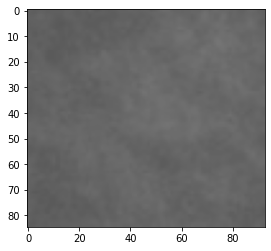

In [ ]:
w = cv2.imread(dfc3_['image'][250])
plt.imshow(w)
w.shape

In [ ]:
dfc_.head()

,image,label
0,/content/drive/MyDrive/Thesis/pos/x_/0.jpg,1
1,/content/drive/MyDrive/Thesis/pos/x_/1.jpg,2
2,/content/drive/MyDrive/Thesis/pos/x_/2.jpg,0
3,/content/drive/MyDrive/Thesis/pos/x_/3.jpg,0
4,/content/drive/MyDrive/Thesis/pos/x_/4.jpg,0


In [ ]:
#@title C MLPTrain
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import tensorflow_addons as tfa
# from WideResnet import WideResnet
from copy import deepcopy
import sklearn
from sklearn import preprocessing

# import config
# from Model import Wrn28k
# from UdaCrossEntroy import UdaCrossEntroy
# from learningRate import LearningRate
# from Dataset import label_image
# from Dataset import unlabel_image
# from Dataset import merge_dataset
# from test import test


def my_update(model, model_):
    for i in range(len(model_)):
        model.weights[i] = model.weights[i].assign(
            model.weights[i]*(1-EMA)+model_[i]*EMA)
    model_ = deepcopy(model.weights)
    return model, model_


if __name__ == '__main__':
    AUTOTUNE = tf.data.experimental.AUTOTUNE

    # 有标签的数据集 batch_size=BATCH_SIZE
    # df_label = pd.read_csv(LABEL_FILE_PATH)
    le = preprocessing.LabelEncoder()
    dfc_['label'] = le.fit_transform(dfc_.label.values)

    u_file_paths = []
    u_labels = []
    for i in range(0, len(data)): 
      path = root + data["fullPath"][i]#2499
      path = path.replace('\\', '/')
      path = path.replace('.png', '.jpg')
      u_file_paths.append(path)
      if data["Status"][i] =="Cancer":
        u_labels.append(3)
      elif data["Status"][i] == "Normal":
        u_labels.append(1)
      elif data["Status"][i] == "Benign" :
        u_labels.append(2)
  
    train_dfc_ = dfc_[:int(len(dfc_)*0.7)] 
    test_dfc_ = dfc_[-int(len(dfc_)*0.7):]
    t_file_paths = test_dfc_['image'].values
    t_labels = test_dfc_['label'].values
    file_paths = train_dfc_['image'].values
    labels = train_dfc_['label'].values
    ds_label_train = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    ds_label_train = ds_label_train \
        .map(label_image, num_parallel_calls=AUTOTUNE) \
        .shuffle(buffer_size=4000) \
        .batch(BATCH_SIZE, drop_remainder=True) \
        .prefetch(AUTOTUNE)

    # 无标签的数据集 batch_size=BATCH_SIZE*UDA_DATA
    # df_unlabel = pd.read_csv(UNLABEL_FILE_PATH)
    # file_paths = df_unlabel['name'].values
    # labels = df_unlabel['label'].values
    ds_unlabel_train = tf.data.Dataset.from_tensor_slices((u_file_paths, u_labels))
    ds_unlabel_train = ds_unlabel_train \
        .map(unlabel_image, num_parallel_calls=AUTOTUNE) \
        .shuffle(buffer_size=50000) \
        .batch(BATCH_SIZE * UDA_DATA, drop_remainder=True) \
        .prefetch(AUTOTUNE)

    # 将有标签数据和无标签数据整合成最终的数据形式
    ds_train = tf.data.Dataset.zip((ds_label_train, ds_unlabel_train))
    ds_train = ds_train.map(merge_dataset)

    # 构建teacher模型
    if TEA_CONTINUE:
        print('continue teacher training')
        teacher = modelT#efficientunet.get_efficient_unet_b0(input_shape, pretrained=False)
        teacher.load_weights(TEA_LOAD_PATH)
        teacher.training = True
    else:
        # teacher = Wrn28k(num_inp_filters=3, k=2)
        teacher =  modelT#efficientunet.get_efficient_unet_b0(input_shape, pretrained=False)

    # 构建student模型
    if STD_CONTINUE:
        print('continue student training')
        student =  modelS#efficientunet.get_efficient_unet_b0(input_shape,  pretrained=False)
        student.load_weights(STD_LOAD_PATH)
        student.training = True
        student = tf.saved_model.load(STD_LOAD_PATH)
    else:
        # student = Wrn28k(num_inp_filters=3, k=2)
        student =  modelS#efficientunet.get_efficient_unet_b0(input_shape, pretrained=False)
    student_ = student.weights

    # 定义teacher的损失函数，损失函数之一为UdaCrossEntroy
    mpl_loss = tf.losses.CategoricalCrossentropy(
        reduction=tf.losses.Reduction.NONE,
        from_logits=True,
    )
    # 定义student的损失函数， PS：teacher的损失函数为UdaCrossEntroy
    s_unlabel_loss = tf.losses.CategoricalCrossentropy(
        label_smoothing=LABEL_SMOOTHING,
        from_logits=True,
        reduction=tf.keras.losses.Reduction.NONE,
    )

    s_label_loss = tf.losses.CategoricalCrossentropy(
        reduction=tf.keras.losses.Reduction.NONE,
        from_logits=True,
    )

    # 定义teacher的学习率
    Tea_lr_fun = LearningRate(
        TEACHER_LR,
        TEACHER_LR_WARMUP_STEPS,
        TEACHER_NUM_WAIT_STEPS
    )
    # 定义student的学习率
    Std_lr_fun = LearningRate(
        STUDENT_LR,
        STUDENT_LR_WARMUP_STEPS,
        STUDENT_LR_WAIT_STEPS
    )

    global_step = 62*CONTINUE_EPOCH
    print(f'start training from global step {global_step}......')
    TBacc = 0.78
    Tacc = 0
    SBacc = 0.31
    Sacc = 0
    epochs = MAX_EPOCHS - CONTINUE_EPOCH
    for epoch in range(epochs):
        TLOSS = 0
        TLOSS_1 = 0
        TLOSS_2 = 0
        TLOSS_3 = 0
        SLOSS = 0
        for batch_idx, (l_images, l_labels, ori_images, aug_images) in enumerate(ds_train):
            global_step += 1
            all_images = tf.concat([l_images, ori_images, aug_images], axis=0)  # shape [15, 32, 32, 3]
            u_aug_and_l_images = tf.concat([aug_images, l_images], axis=0)
            # step1：经过teacher，得到输出
            with tf.GradientTape() as t_tape:
                output = teacher(all_images)  # shape=[15, 10]
                logits, labels, masks, cross_entroy = UdaCrossEntroy(output, l_labels, global_step)
            # step2：1st call student -----------------------------
            with tf.GradientTape() as s_tape:
                logits['s_on_aug_and_l'] = student(u_aug_and_l_images)  # shape=[8, 10]
                logits['s_on_u'], logits['s_on_l_old'] = tf.split(
                    logits['s_on_aug_and_l'],
                    [aug_images.shape[0], l_images.shape[0]],
                    axis=0
                )
                cross_entroy['s_on_u'] = s_unlabel_loss(
                    y_true=tf.stop_gradient(tf.nn.softmax(logits['aug'], -1)),
                    y_pred=logits['s_on_u']
                )
                # 计算损失函数
                cross_entroy['s_on_u'] = tf.reduce_sum(cross_entroy['s_on_u']) / \
                                         tf.convert_to_tensor(BATCH_SIZE * UDA_DATA, dtype=tf.float32)
                SLOSS += cross_entroy['s_on_u']
                # for taylor
                cross_entroy['s_on_l_old'] = s_label_loss(
                    y_true=labels['l'],
                    y_pred=logits['s_on_l_old']
                )

                cross_entroy['s_on_l_old'] = tf.reduce_sum(cross_entroy['s_on_l_old']) / \
                                             tf.convert_to_tensor(BATCH_SIZE, dtype=tf.float32)
            # 反向传播，更新student的参数-------
            StudentLR = Std_lr_fun.__call__(global_step=global_step)
            StdOptim = keras.optimizers.SGD(
                learning_rate=StudentLR,
                momentum=0.9,
                nesterov=True,
                # weight_decay=5e-4,
            )
            # StdOptim = keras.optimizers.Adam(learning_rate=StudentLR)
            GStud_unlabel = s_tape.gradient(cross_entroy['s_on_u'], student.trainable_variables)
            GStud_unlabel, _ = tf.clip_by_global_norm(GStud_unlabel, GRAD_BOUND)
            StdOptim.apply_gradients(zip(GStud_unlabel, student.trainable_variables))
            # 如何更新参数
            student, student_ = my_update(student, student_)

            # step3: 2nd call student ------------------------------
            logits['s_on_l_new'] = student(l_images)
            cross_entroy['s_on_l_new'] = s_label_loss(
                y_true=labels['l'],
                y_pred=logits['s_on_l_new']
            )
            cross_entroy['s_on_l_new'] = tf.reduce_sum(cross_entroy['s_on_l_new']) / \
                                         tf.convert_to_tensor(BATCH_SIZE, dtype=DTYPE)
            dot_product = cross_entroy['s_on_l_new'] - cross_entroy['s_on_l_old']
            limit = 3.0**(0.5)
            moving_dot_product = tf.random_uniform_initializer(minval=-limit, maxval=limit)(shape=dot_product.shape)
            moving_dot_product = tf.Variable(initial_value=moving_dot_product, trainable=False, dtype=DTYPE)
            moving_dot_product_update = moving_dot_product.assign_sub(0.01 * (moving_dot_product - dot_product))
            dot_product = dot_product - moving_dot_product
            dot_product = tf.stop_gradient(dot_product)
            # step4: 求teacher的损失函数
            with t_tape:
                # label = tf.math.argmax(tf.nn.softmax(logits['aug'], axis=-1), axis=-1)
                # label = tf.raw_ops.OneHot(indices=label, depth=NUM_CLASSES, on_value=1.0, off_value=0)
                cross_entroy['mpl'] = mpl_loss(
                    # y_true=tf.stop_gradient(label),
                    y_true=tf.stop_gradient(tf.nn.softmax(logits['aug'], axis=-1)),
                    y_pred=logits['aug']
                )  # 恒正
                cross_entroy['mpl'] = tf.reduce_sum(cross_entroy['mpl']) / \
                                      tf.convert_to_tensor(BATCH_SIZE * UDA_DATA, dtype=DTYPE)
                uda_weight = UDA_WEIGHT * tf.math.minimum(
                    1., tf.cast(global_step, DTYPE) / float(UDA_STEPS)
                )
                # if StudentLR == 0:
                #     dot_product = 0
                teacher_loss = cross_entroy['u'] * uda_weight + \
                               cross_entroy['l'] + \
                               cross_entroy['mpl'] * dot_product

                TLOSS += teacher_loss
                TLOSS_1 += (cross_entroy['u'] * uda_weight)
                TLOSS_2 += cross_entroy['l']
                TLOSS_3 += cross_entroy['mpl'] * dot_product
            # 反向传播，更新teacher的参数-------
            TeacherLR = Tea_lr_fun.__call__(global_step=global_step)
            TeaOptim = keras.optimizers.SGD(
                learning_rate=TeacherLR,
                momentum=0.9,
                nesterov=True,
                # weight_decay=5e-4,
            )
            # TeaOptim = keras.optimizers.Adam(learning_rate=TeacherLR)
            GTea = t_tape.gradient(teacher_loss, teacher.trainable_variables)
            GTea, _ = tf.clip_by_global_norm(GTea, GRAD_BOUND)
            TeaOptim.apply_gradients(zip(GTea, teacher.trainable_variables))

            if (batch_idx + 1) % LOG_EVERY == 0:
                TLOSS = TLOSS / LOG_EVERY
                TLOSS_1 = TLOSS_1 / LOG_EVERY
                TLOSS_2 = TLOSS_2 / LOG_EVERY
                TLOSS_3 = TLOSS_3 / LOG_EVERY
                SLOSS = SLOSS / LOG_EVERY
                print(f'global: %4d' % global_step + ',[epoch:%4d/' % (epoch+CONTINUE_EPOCH) + 'EPOCH: %4d] \t' % epochs
                      + '[U:%.4f' % (TLOSS_1) + ', L:%.4f' % (TLOSS_2) + ', M:%.4f' % (
                          TLOSS_3) + ']' + '[TLoss: %.4f]' % TLOSS + '/[SLoss: %.4f]' % SLOSS
                      + '\t[TLR: %.6f' % TeacherLR + ']/[SLR: %.6f]' % StudentLR)
                TLOSS = 0
                TLOSS_1 = 0
                TLOSS_2 = 0
                TLOSS_3 = 0
                SLOSS = 0
        # 测试teacher在test上的acc
        if epoch % 5 == 0:
            Tacc = test(teacher, t_file_paths, t_labels)
            print(f'testing teacher model ... acc: {Tacc}')
        # 测试student在test上的acc，当student开始训练的时候
        if (StudentLR > 0) and (epoch % 5 == 0):
            Sacc = test(student, t_file_paths, t_labels)
            print(f'testing ... acc: {Sacc}')
        # 保存weights
        if Tacc > TBacc:
            Tsave_path = TEA_SAVE_PATH  # + str(epoch + 1) + '_' + str(batch_idx + 1)
            teacher.save_weights(Tsave_path)
            # tf.saved_model.save(teacher, Tsave_path)
            TBacc = Tacc
            print(f'saving for TBacc {TBacc}, Tpath:{Tsave_path}')
        if Sacc > SBacc:
            Ssave_path = STD_SAVE_PATH  # + str(epoch + 1) + '_' + str(batch_idx + 1)
            student.save_weights(Ssave_path)
            SBacc = Sacc
            print(f'saving for SBacc {SBacc}, Spath:{Ssave_path}')

global: 59920,[epoch: 895/EPOCH: 1035] 	[U:0.0000, L:1.0900, M:-0.1077][TLoss: 0.9822]/[SLoss: 1.0986]	[TLR: 0.000141]/[SLR: 0.000131]
global: 59940,[epoch: 895/EPOCH: 1035] 	[U:0.0000, L:1.0870, M:-0.0331][TLoss: 1.0539]/[SLoss: 1.0986]	[TLR: 0.000141]/[SLR: 0.000131]
global: 59960,[epoch: 895/EPOCH: 1035] 	[U:0.0000, L:1.0899, M:0.0577][TLoss: 1.1476]/[SLoss: 1.0986]	[TLR: 0.000141]/[SLR: 0.000131]
global: 59980,[epoch: 895/EPOCH: 1035] 	[U:0.0000, L:1.0946, M:0.2970][TLoss: 1.3916]/[SLoss: 1.0986]	[TLR: 0.000140]/[SLR: 0.000131]
global: 60000,[epoch: 895/EPOCH: 1035] 	[U:0.0000, L:1.0865, M:-0.0024][TLoss: 1.0841]/[SLoss: 1.0986]	[TLR: 0.000140]/[SLR: 0.000131]
global: 60020,[epoch: 895/EPOCH: 1035] 	[U:0.0000, L:1.0890, M:0.0218][TLoss: 1.1108]/[SLoss: 1.0986]	[TLR: 0.000140]/[SLR: 0.000130]
testing teacher model ... acc: 41.15138592750533
testing ... acc: 41.15138592750533
global: 60049,[epoch: 896/EPOCH: 1035] 	[U:0.0000, L:1.0846, M:-0.0907][TLoss: 0.9939]/[SLoss: 1.0986]	[TLR: 

KeyboardInterrupt: ignored

In [ ]:
dfc_['image'].shape

(5362,)

In [ ]:
dfc_['label'].values

(5362,)

In [ ]:
test_dfc_['label'][0]

KeyError: ignored

# MPL

## *Config*

In [ ]:
import tensorflow as tf
#@markdown config




# about dataset
IMG_SIZE = 224 #@param {type:"integer"}
BATCH_SIZE = 8 #@param {type:"integer"}
# LABEL_FILE_PATH = '/content/cifar/label4000.csv' # google
# UNLABEL_FILE_PATH = '/content/cifar/train.csv'

_MAX_LEVEL = 10
CUTOUT_CONST = 40.
TRANSLATE_CONST = 100.
REPLACE_COLOR = [128, 128, 128]


LABEL_FILE_PATH = '../input/cifar10/cifar/label4000.csv'  # kaggle
UNLABEL_FILE_PATH = '../input/cifar10/cifar/train.csv'


AUGMENT_MAGNITUDE = 8
SHUFFLE_SIZE = BATCH_SIZE * 16
DATA_LEN = 400  # 数据集的总长度

# about model
NUM_XLA_SHARDS = -1
BATCH_NORM_EPSILON = 1e-3
BATCH_NORM_DECAY = 0.999
DROPOUT_RATE = 0.
DROPOUT = 0.2
NUM_CLASSES = 3
NUM_CLASS = 3

# about training
LOG_EVERY = 20
SAVE_EVERY = 5
TEA_SAVE_PATH = '/content/drive/MyDrive/Thesis/weights/T'
STD_SAVE_PATH = '/content/drive/MyDrive/Thesis/weights/S'

MAX_EPOCHS = 1920
MAX_STEPS = MAX_EPOCHS * (int(DATA_LEN / BATCH_SIZE)-1)
UDA_WEIGHT = 8  # uda的权重
UDA_STEPS = 2000
TEST_EVERY = 2
GRAD_BOUND = 1e9
EMA = 0.995


# continue train
TEA_CONTINUE = False
STD_CONTINUE = False
TEA_LOAD_PATH = '../input/weights/weights/T'
STD_LOAD_PATH = '../input/weights/weights/S'
CONTINUE_EPOCH = 885


# about testing
# TEST_FILE_PATH = '/content/cifar/test.csv'
TEST_FILE_PATH = '../input/cifar10/cifar/test.csv'
TEST_MODEL_PATH = './weights/S'

# about UdaCrossEntroy
UDA_DATA = 1
LABEL_SMOOTHING = 0.15
UDA_TEMP = 0.7
UDA_THRESHOLD = 0.6

# about learning rate
STUDENT_LR = 0.0005  # student
STUDENT_LR_WARMUP_STEPS = 4000
STUDENT_LR_WAIT_STEPS = 2000
TEACHER_LR = 0.0005  # teacher
TEACHER_LR_WARMUP_STEPS = 1000
TEACHER_NUM_WAIT_STEPS = 0

LR_DECAY_TYPE = 'cosine'  # constant, exponential, cosine
NUM_DECAY_STEPS = 300
LR_DECAY_RATE = 0.97

# about optimizer
OPTIM_TYPE = 'sgd'  # sgd, momentum, rmsprop
WEIGHT_DECAY = 5e-4


# dtype
DTYPE = tf.float32

## *UdaCrossEntropy*

In [ ]:
#@markdown Unsupervised domain adaptive cross entropy
# import os

# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

# import config
# from Model import Wrn28k


def UdaCrossEntroy(all_logits, l_labels, global_step):
    batch_size = BATCH_SIZE
    uda_data = UDA_DATA
    logits = {}
    labels = {}
    cross_entroy = {}
    masks = {}
    # 将网络的输出结果区分成 label ori aug 三个部分
    logits['l'], logits['ori'], logits['aug'] = tf.split(
        all_logits,
        [batch_size, batch_size * uda_data, batch_size * uda_data],
        axis=0,
    )
    # 对标签进行处理
    labels['l'] = l_labels

    # ------------loss的计算---------
    # part1：有监督部分
    cross_entroy['l'] = keras.losses.sparse_categorical_crossentropy(
        from_logits=True,
        label_smoothing=LABEL_SMOOTHING,
        reduction=keras.losses.Reduction.NONE,
    )(labels['l'], logits['l'])
    '''
    probs = tf.nn.softmax(logits['l'], axis=-1)  # 将每张图片对应10个类别的输出转化为概率的形式
    correct_probs = tf.reduce_sum(labels['l'] * probs, axis=-1)  # 根据图片对应的label和概率计算出 预测正确类别的概率

    # 计算一个阈值l_threshold
    r = tf.cast(global_step, tf.float32) / tf.convert_to_tensor(MAX_STEPS, dtype=tf.float32)
    num_classes = tf.convert_to_tensor(NUM_CLASSES, tf.float32)
    l_threshold = r * (1. - 1. / num_classes) + 1. / num_classes

    masks['l'] = tf.math.less_equal(correct_probs, l_threshold)
    masks['l'] = tf.cast(masks['l'], tf.float32)
    masks['l'] = tf.stop_gradient(masks['l'])  # 如果对某图片预测的概率小于l_threahold,输出1，否则是0
    '''
    cross_entroy['l'] = tf.reduce_sum(cross_entroy['l']) / float(batch_size)

    # part2: 无监督部分
    labels['ori'] = tf.nn.softmax(logits['ori'] / tf.convert_to_tensor(UDA_TEMP), axis=-1)
    labels['ori'] = tf.stop_gradient(labels['ori'])
    # tf.nn.log_softmax: 设一张图片对应3个类别的输出为o1，o2，o3 ==>
    # b = log(sum(exp(o1) + exp(o2) + exp(o3)))  new_o1=o1-b, new_o2=o2-b ... 恒负，大小关系不变
    cross_entroy['u'] = (
            labels['ori'] * tf.nn.log_softmax(logits['aug'], axis=-1)
    )

    largest_probs = tf.reduce_max(labels['ori'], axis=-1, keepdims=True)

    masks['u'] = tf.math.greater_equal(largest_probs, tf.constant(UDA_THRESHOLD))  # Determine whether the maximum probability is greater than the threshold    masks['u'] = tf.cast(masks['u'], DTYPE)
    masks['u'] = tf.stop_gradient(masks['u'])
    # In extreme cases, when ori’s prediction is completely accurate, that is, class i = 1, other categories are 0,
    # aug's class i is the largest, that is, the largest negative number, multiplying the two and then taking the negative, is a number very close to 0
    # 极端情况，当ori的预测完全准确，即class i = 1, 其他类别为0时，
    # aug的class i最大，即最大的负数，两者相乘再取负，就是一个非常接近于0的数字
    cross_entroy['u'] = tf.reduce_sum(-cross_entroy['u'] * masks['u']) / \
                        tf.convert_to_tensor((batch_size * uda_data), dtype=DTYPE)

    return logits, labels, masks, cross_entroy

In [ ]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# import sys  
# sys.path.insert(0, '/content/drive/MyDrive/Thesis/MPL/EfficientUnet/efficientunet')
import tensorflow as tf
from tensorflow import keras
# import pandas as pd
import tensorflow_addons as tfa
# from WideResnet import WideResnet



# import efficientunet
# import efficientnet
from copy import deepcopy


sys.path.insert(0, '/content/drive/MyDrive/Thesis/MPL')
import config
# from Model import Wrn28k
# from UdaCrossEntroy import UdaCrossEntroy
# from learningRate import LearningRate
# from Dataset import label_image
# from Dataset import unlabel_image
# from Dataset import merge_dataset
# from test import test

In [ ]:
input_shape = (224, 224, 1)

In [ ]:

model2 = efficientunet.get_efficient_unet_b0(input_shape, out_channels=3, pretrained=False, block_type='transpose', concat_input=True)
model2.summary()

In [ ]:
img_data_array=[]
class_name=[]
for i in range(0, len(data)): 
  path = root + data["fullPath"][i]#2499
  path = path.replace('\\', '/')
  path = path.replace('.png', '.jpg')
  try:
    image = Image.open(path)
    #image= cv2.imread( path,0)
    # print(image.size)
    image=cv2.resize(image, (224, 224),interpolation = cv2.INTER_AREA)
    # print(image.size)
    # image=cv2.resize(image, (224, 224),interpolation = cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    img_data_array.append(image)
    class_name.append(data["Status"][i])
  except:
    continue
  # return img_data_array, class_name
# extract the image array and class name




In [ ]:
def image_generator(files, batch_size = 32, sz = (224, 224)):
  
  while True: 
    
    #extract a random batch 
    batch = np.random.choice(files, size = batch_size)    
    
    #variables for collecting batches of inputs and outputs 
    batch_x = []
    batch_y = []
    
    
    for f in batch:
        path_ = root + f["fullPath"]
        path_ = path_.replace('\\', '/')
        path_ = path_.replace('.png', '.jpg')
        #get the masks. Note that masks are png files 
        mask = Image.open(path)
        mask = np.array(mask.resize(sz))


        #preprocess the mask 
        mask[mask >= 2] = 0 
        mask[mask != 0 ] = 1
        
        batch_y.append(mask)

        #preprocess the raw images 
        path = root + f["fullPath"]
        path = path.replace('\\', '/')
        path = path.replace('.png', '.jpg')
        raw = Image.open(path)
        raw = raw.resize(sz)
        raw = np.array(raw)

        #check the number of channels because some of the images are RGBA or GRAY
        if len(raw.shape) == 2:
          raw = np.stack((raw,)*3, axis=-1)

        else:
          raw = raw[:,:,0:3]

        batch_x.append(raw)

    #preprocess a batch of images and masks 
    batch_x = np.array(batch_x)/255.
    batch_y = np.array(batch_y)
    batch_y = np.expand_dims(batch_y,3)

    yield (batch_x, batch_y) 

# Training

In [ ]:
train_generator = image_generator(data, batch_size = 32)

In [ ]:
train_generator

# IoU metric

The intersection over union (IoU) metric is a simple metric used to evaluate the performance of a segmentation algorithm. Given two masks $y_{true}, y_{pred}$ we evaluate 

$$IoU = \frac{y_{true} \cap y_{pred}}{y_{true} \cup y_{pred}}$$

In [ ]:
from keras import backend as K
def mean_iou(y_true, y_pred):
    yt0 = y_true[:,:,:,0]
    yp0 = K.cast(y_pred[:,:,:,0] > 0.5, 'float32')
    inter = tf.math.count_nonzero(tf.logical_and(tf.equal(yt0, 1), tf.equal(yp0, 1)))
    union = tf.math.count_nonzero(tf.add(yt0, yp0))
    iou = tf.where(tf.equal(union, 0), 1., tf.cast(inter/union, 'float32'))
    return iou

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
def build_callbacks():
        checkpointer = ModelCheckpoint(filepath='unet.h5', verbose=0, save_best_only=True, save_weights_only=True)
        callbacks = [checkpointer, PlotLearning()]
        return callbacks

# inheritance for training process plot 
class PlotLearning(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        #self.fig = plt.figure()
        self.logs = []
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('mean_iou'))
        self.val_acc.append(logs.get('val_mean_iou'))
        self.i += 1
        print('i=',self.i,'loss=',logs.get('loss'),'val_loss=',logs.get('val_loss'),'mean_iou=',logs.get('mean_iou'),'val_mean_iou=',logs.get('val_mean_iou'))
        
        #choose a random test image and preprocess
        path = np.random.choice(test_files)
        raw = Image.open(f'images/{path}')
        raw = np.array(raw.resize((256, 256)))/255.
        raw = raw[:,:,0:3]
        
        #predict the mask 
        pred = model.predict(np.expand_dims(raw, 0))
        
        #mask post-processing 
        msk  = pred.squeeze()
        msk = np.stack((msk,)*3, axis=-1)
        msk[msk >= 0.5] = 1 
        msk[msk < 0.5] = 0 
        
        #show the mask and the segmented image 
        combined = np.concatenate([raw, msk, raw* msk], axis = 1)
        plt.axis('off')
        plt.imshow(combined)
        plt.show()

# New section

In [ ]:
 model2.compile(optimizer = tf.keras.optimizers.RMSprop(lr=1e-5), loss = 'binary_crossentropy', metrics = [mean_iou])

In [ ]:
train_steps = len(data) //32
# rmodel2.fit(
#     x= X_train, y= Y_train,
#     batch_size=None,
#     epochs=1,
#     verbose="auto",
#     callbacks=None,
#     validation_split=0.0,
#     validation_data=None,
#     shuffle=True,
#     class_weight=None,
#     sample_weight=None,
#     initial_epoch=0,
#     steps_per_epoch=None,
#     validation_steps=None,
#     validation_batch_size=None,
#     validation_freq=1,
#     max_queue_size=10,
#     workers=1,
#     use_multiprocessing=False
# )
callbacks = [ModelCheckpoint(filepath='/content/drive/MyDrive/Thesis/effunet.h5', verbose=0, save_best_only=True, save_weights_only=True),
        tf.keras.callbacks.EarlyStopping(patience=40, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model2.fit(X_train, Y_train, validation_split=0.1, batch_size=8, epochs=30, callbacks=callbacks)

In [ ]:
ds_label_train = tf.data.Dataset.from_tensor_slices((X, Y))
ds_label_train = ds_label_train.shuffle(100).batch(64)
train_dataset

In [ ]:
from tensorflow.keras.applications import EfficientNetB0


In [ ]:
# x = img_augmentation(inputs)
model = EfficientNetB0( input_shape=input_shape,include_top=True, weights=None, classes=3,classifier_activation=None)

In [ ]:
df_['']

In [ ]:
def my_update(model, model_):
    for i in range(len(model_)):
        #print(model_[i])
        # if model.weights[i].dtype != np.float32 :
        #   model.weights[i] = tf.cast(model.weights[i], dtype=float32)
        #   model_[i] = tf.cast(model_[i], dtype=float32)
          # continue
        model.weights[i] = model.weights[i].assign(
            model.weights[i]*(1-config.EMA)+model_[i]*config.EMA)
    model_ = deepcopy(model.weights)
    return model, model_


if __name__ == '__main__':
    AUTOTUNE = tf.data.experimental.AUTOTUNE

    # 有标签的数据集 batch_size=config.BATCH_SIZE
    # df_label = pd.read_csv(config.LABEL_FILE_PATH)
    # file_paths = []
    # labels = []
    # for i in range(0, len(data)): 
    #   path = root + data["fullPath"][i]#2499
    #   path = path.replace('\\', '/')
    #   path = path.replace('.png', '.jpg')
    #   file_paths.append(path)
    #   if data["Status"][i] =="Cancer":
    #     labels.append(3)
    #   elif data["Status"][i] == "Normal":
    #     labels.append(1)
    #   elif data["Status"][i] == "Benign" :
    #     labels.append(2)

    # labels = data['Status'].values
    # for i in range(0, len(data)): 
    ds_label_train = tf.data.Dataset.from_tensor_slices((df_['image'], df_['label']))
    # ds_label_train = ds_label_train.shuffle(100).batch(64)
    ds_label_train = ds_label_train \
        .map(label_image, num_parallel_calls=AUTOTUNE) \
        .shuffle(buffer_size=1000) \
        .batch(config.BATCH_SIZE, drop_remainder=True) \
        .prefetch(AUTOTUNE)

    # 无标签的数据集 batch_size=config.BATCH_SIZE*config.UDA_DATA
    # df_unlabel = pd.read_csv(config.UNLABEL_FILE_PATH)
    # file_paths = df_unlabel['name'].values
    # labels = df_unlabel['label'].values
    ds_unlabel_train = tf.data.Dataset.from_tensor_slices((df_['image'], df_['label']))
    # ds_label_train = ds_label_train.shuffle(100).batch(64)
    # ds_unlabel_train = ds_unlabel_train.shuffle(100).batch(64)
    ds_unlabel_train = ds_unlabel_train \
        .map(unlabel_image, num_parallel_calls=AUTOTUNE) \
        .shuffle(buffer_size=1000) \
        .batch(config.BATCH_SIZE * config.UDA_DATA, drop_remainder=True) \
        .prefetch(AUTOTUNE)

    # 将有标签数据和无标签数据整合成最终的数据形式
    ds_train = tf.data.Dataset.zip((ds_label_train, ds_unlabel_train))
    ds_train = ds_train.map(merge_dataset)

    # 构建teacher模型
    if config.TEA_CONTINUE:
        print('continue teacher training')
        teacher = model2#efficientunet.get_efficient_unet_b0(input_shape, pretrained=False)
        teacher.load_weights(config.TEA_LOAD_PATH)
        teacher.training = True
    else:
        # teacher = Wrn28k(num_inp_filters=3, k=2)
        teacher =  model2#efficientunet.get_efficient_unet_b0(input_shape, pretrained=False)

    # 构建student模型
    if config.STD_CONTINUE:
        print('continue student training')
        student =  model2#efficientunet.get_efficient_unet_b0(input_shape,  pretrained=False)
        student.load_weights(config.STD_LOAD_PATH)
        student.training = True
        student = tf.saved_model.load(config.STD_LOAD_PATH)
    else:
        # student = Wrn28k(num_inp_filters=3, k=2)
        student =  model2#efficientunet.get_efficient_unet_b0(input_shape, pretrained=False)
    student_ = student.weights

    for i in range(len(student_)):
      #print(model_[i])
      if student.weights[i].dtype != np.float32 :
        student.weights[i] = tf.cast(student.weights[i], dtype=float32)
        student_[i] = tf.cast(student_[i], dtype=float32)
    # 定义teacher的损失函数，损失函数之一为UdaCrossEntroy
    mpl_loss = tf.losses.SparseCategoricalCrossentropy(
        reduction=tf.losses.Reduction.NONE,
        from_logits=True,
    )
    # 定义student的损失函数， PS：teacher的损失函数为UdaCrossEntroy
    s_unlabel_loss = tf.losses.SparseCategoricalCrossentropy(
        label_smoothing=config.LABEL_SMOOTHING,
        from_logits=True,
        reduction=tf.keras.losses.Reduction.NONE,
    )

    s_label_loss = tf.losses.SparseCategoricalCrossentropy(
        reduction=tf.keras.losses.Reduction.NONE,
        from_logits=True,
    )

    # 定义teacher的学习率
    Tea_lr_fun = LearningRate(
        config.TEACHER_LR,
        config.TEACHER_LR_WARMUP_STEPS,
        config.TEACHER_NUM_WAIT_STEPS
    )
    # 定义student的学习率
    Std_lr_fun = LearningRate(
        config.STUDENT_LR,
        config.STUDENT_LR_WARMUP_STEPS,
        config.STUDENT_LR_WAIT_STEPS
    )

    global_step = 62*config.CONTINUE_EPOCH
    print(f'start training from global step {global_step}......')
    TBacc = 0.78
    Tacc = 0
    SBacc = 0.31
    Sacc = 0
    epochs = config.MAX_EPOCHS - config.CONTINUE_EPOCH
    for epoch in range(epochs):
        TLOSS = 0
        TLOSS_1 = 0
        TLOSS_2 = 0
        TLOSS_3 = 0
        SLOSS = 0
        for batch_idx, (l_images, l_labels, ori_images, aug_images) in enumerate(ds_train):
            global_step += 1
            all_images = tf.concat([l_images, ori_images, aug_images], axis=0)  # shape [15, 32, 32, 3]
            u_aug_and_l_images = tf.concat([aug_images, l_images], axis=0)
            # step1：经过teacher，得到输出
            with tf.GradientTape() as t_tape:
                output = teacher(all_images)  # shape=[15, 10]
                logits, labels, masks, cross_entroy = UdaCrossEntroy(output, l_labels, global_step)
            # step2：1st call student -----------------------------
            with tf.GradientTape() as s_tape:
                logits['s_on_aug_and_l'] = student(u_aug_and_l_images)  # shape=[8, 10]
                logits['s_on_u'], logits['s_on_l_old'] = tf.split(
                    logits['s_on_aug_and_l'],
                    [aug_images.shape[0], l_images.shape[0]],
                    axis=0
                )
                cross_entroy['s_on_u'] = s_unlabel_loss(
                    y_true=tf.stop_gradient(tf.nn.softmax(logits['aug'], -1)),
                    y_pred=logits['s_on_u']
                )
                # 计算损失函数
                cross_entroy['s_on_u'] = tf.reduce_sum(cross_entroy['s_on_u']) / \
                                         tf.convert_to_tensor(config.BATCH_SIZE * config.UDA_DATA, dtype=tf.float32)
                SLOSS += cross_entroy['s_on_u']
                # for taylor
                cross_entroy['s_on_l_old'] = s_label_loss(
                    y_true=labels['l'],
                    y_pred=logits['s_on_l_old']
                )

                cross_entroy['s_on_l_old'] = tf.reduce_sum(cross_entroy['s_on_l_old']) / \
                                             tf.convert_to_tensor(config.BATCH_SIZE, dtype=tf.float32)
            # 反向传播，更新student的参数-------
            StudentLR = Std_lr_fun.__call__(global_step=global_step)
            StdOptim = keras.optimizers.SGD(
                learning_rate=StudentLR,
                momentum=0.9,
                nesterov=True,
                # weight_decay=5e-4,
            )
            # StdOptim = keras.optimizers.Adam(learning_rate=StudentLR)
            GStud_unlabel = s_tape.gradient(cross_entroy['s_on_u'], student.trainable_variables)
            GStud_unlabel, _ = tf.clip_by_global_norm(GStud_unlabel, config.GRAD_BOUND)
            StdOptim.apply_gradients(zip(GStud_unlabel, student.trainable_variables))
            # 如何更新参数
            student, student_ = my_update(student, student_)

            # step3: 2nd call student ------------------------------
            logits['s_on_l_new'] = student(l_images)
            cross_entroy['s_on_l_new'] = s_label_loss(
                y_true=labels['l'],
                y_pred=logits['s_on_l_new']
            )
            cross_entroy['s_on_l_new'] = tf.reduce_sum(cross_entroy['s_on_l_new']) / \
                                         tf.convert_to_tensor(config.BATCH_SIZE, dtype=config.DTYPE)
            dot_product = cross_entroy['s_on_l_new'] - cross_entroy['s_on_l_old']
            limit = 3.0**(0.5)
            moving_dot_product = tf.random_uniform_initializer(minval=-limit, maxval=limit)(shape=dot_product.shape)
            moving_dot_product = tf.Variable(initial_value=moving_dot_product, trainable=False, dtype=config.DTYPE)
            moving_dot_product_update = moving_dot_product.assign_sub(0.01 * (moving_dot_product - dot_product))
            dot_product = dot_product - moving_dot_product
            dot_product = tf.stop_gradient(dot_product)
            # step4: 求teacher的损失函数
            with t_tape:
                # label = tf.math.argmax(tf.nn.softmax(logits['aug'], axis=-1), axis=-1)
                # label = tf.raw_ops.OneHot(indices=label, depth=config.NUM_CLASSES, on_value=1.0, off_value=0)
                cross_entroy['mpl'] = mpl_loss(
                    # y_true=tf.stop_gradient(label),
                    y_true=tf.stop_gradient(tf.nn.softmax(logits['aug'], axis=-1)),
                    y_pred=logits['aug']
                )  # 恒正
                cross_entroy['mpl'] = tf.reduce_sum(cross_entroy['mpl']) / \
                                      tf.convert_to_tensor(config.BATCH_SIZE * config.UDA_DATA, dtype=config.DTYPE)
                uda_weight = config.UDA_WEIGHT * tf.math.minimum(
                    1., tf.cast(global_step, config.DTYPE) / float(config.UDA_STEPS)
                )
                # if StudentLR == 0:
                #     dot_product = 0
                teacher_loss = cross_entroy['u'] * uda_weight + \
                               cross_entroy['l'] + \
                               cross_entroy['mpl'] * dot_product

                TLOSS += teacher_loss
                TLOSS_1 += (cross_entroy['u'] * uda_weight)
                TLOSS_2 += cross_entroy['l']
                TLOSS_3 += cross_entroy['mpl'] * dot_product
            # 反向传播，更新teacher的参数-------
            TeacherLR = Tea_lr_fun.__call__(global_step=global_step)
            TeaOptim = keras.optimizers.SGD(
                learning_rate=TeacherLR,
                momentum=0.9,
                nesterov=True,
                # weight_decay=5e-4,
            )
            # TeaOptim = keras.optimizers.Adam(learning_rate=TeacherLR)
            GTea = t_tape.gradient(teacher_loss, teacher.trainable_variables)
            GTea, _ = tf.clip_by_global_norm(GTea, config.GRAD_BOUND)
            TeaOptim.apply_gradients(zip(GTea, teacher.trainable_variables))

            if (batch_idx + 1) % config.LOG_EVERY == 0:
                TLOSS = TLOSS / config.LOG_EVERY
                TLOSS_1 = TLOSS_1 / config.LOG_EVERY
                TLOSS_2 = TLOSS_2 / config.LOG_EVERY
                TLOSS_3 = TLOSS_3 / config.LOG_EVERY
                SLOSS = SLOSS / config.LOG_EVERY
                print(f'global: %4d' % global_step + ',[epoch:%4d/' % (epoch+config.CONTINUE_EPOCH) + 'EPOCH: %4d] \t' % epochs
                      + '[U:%.4f' % (TLOSS_1) + ', L:%.4f' % (TLOSS_2) + ', M:%.4f' % (
                          TLOSS_3) + ']' + '[TLoss: %.4f]' % TLOSS + '/[SLoss: %.4f]' % SLOSS
                      + '\t[TLR: %.6f' % TeacherLR + ']/[SLR: %.6f]' % StudentLR)
                TLOSS = 0
                TLOSS_1 = 0
                TLOSS_2 = 0
                TLOSS_3 = 0
                SLOSS = 0
        # 测试teacher在test上的acc
        if epoch % 5 == 0:
            Tacc = test(teacher, file_paths, labels)
            print(f'testing teacher model ... acc: {Tacc}')
        # 测试student在test上的acc，当student开始训练的时候
        if (StudentLR > 0) and (epoch % 5 == 0):
            Sacc = test(student, file_paths, labels)
            print(f'testing ... acc: {Sacc}')
        # 保存weights
        if Tacc > TBacc:
            Tsave_path = config.TEA_SAVE_PATH  # + str(epoch + 1) + '_' + str(batch_idx + 1)
            teacher.save_weights(Tsave_path)
            # tf.saved_model.save(teacher, Tsave_path)
            TBacc = Tacc
            print(f'saving for TBacc {TBacc}, Tpath:{Tsave_path}')
        if Sacc > SBacc:
            Ssave_path = config.STD_SAVE_PATH  # + str(epoch + 1) + '_' + str(batch_idx + 1)
            student.save_weights(Ssave_path)
            SBacc = Sacc
            print(f'saving for SBacc {SBacc}, Spath:{Ssave_path}')

In [ ]:
student.weights

In [ ]:
teacher.weights

## Others

In [ ]:
mod = keras.Sequential()
mod.add(model)
mod.summary()

In [ ]:
%cd /content/drive/MyDrive/Thesis

In [ ]:
import sys  
sys.path.insert(0, '/content/drive/MyDrive/Thesis/EfficientUnet/efficientunet')


import efficientunet
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB6

import keras

In [ ]:
input_shape = (224, 224, 3)
model2 = efficientunet.get_efficient_unet_b7(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True)
model2.summary()

In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print('TF version:', tf.__version__)
print('Hub version:', hub.__version__)
print('Phsical devices:', tf.config.list_physical_devices())

def get_hub_url_and_isize(model_name, ckpt_type, hub_type):
  if ckpt_type == '-1k':
    ckpt_type = ''  # json doesn't support empty string
  
  hub_url_map = {
    'efficientnetv2-b0': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0/{hub_type}',
    'efficientnetv2-b1': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b1/{hub_type}',
    'efficientnetv2-b2': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b2/{hub_type}',
    'efficientnetv2-b3': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b3/{hub_type}',
    'efficientnetv2-s':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s/{hub_type}',
    'efficientnetv2-m':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m/{hub_type}',
    'efficientnetv2-l':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l/{hub_type}',
    'efficientnetv2-s-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s-21k/{hub_type}',
    'efficientnetv2-m-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m-21k/{hub_type}',
    'efficientnetv2-l-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l-21k/{hub_type}',
    'efficientnetv2-s-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s-21k-ft1k/{hub_type}',
    'efficientnetv2-m-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m-21k-ft1k/{hub_type}',
    'efficientnetv2-l-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l-21k-ft1k/{hub_type}',
      
    # efficientnetv1
    'efficientnet_b0': f'https://tfhub.dev/tensorflow/efficientnet/b0/{hub_type}/1',
    'efficientnet_b1': f'https://tfhub.dev/tensorflow/efficientnet/b1/{hub_type}/1',
    'efficientnet_b2': f'https://tfhub.dev/tensorflow/efficientnet/b2/{hub_type}/1',
    'efficientnet_b3': f'https://tfhub.dev/tensorflow/efficientnet/b3/{hub_type}/1',
    'efficientnet_b4': f'https://tfhub.dev/tensorflow/efficientnet/b4/{hub_type}/1',
    'efficientnet_b5': f'https://tfhub.dev/tensorflow/efficientnet/b5/{hub_type}/1',
    'efficientnet_b6': f'https://tfhub.dev/tensorflow/efficientnet/b6/{hub_type}/1',
    'efficientnet_b7': f'https://tfhub.dev/tensorflow/efficientnet/b7/{hub_type}/1',
  }
  
  image_size_map = {
    'efficientnetv2-b0': 224,
    'efficientnetv2-b1': 240,
    'efficientnetv2-b2': 260,
    'efficientnetv2-b3': 300,
    'efficientnetv2-s':  384,
    'efficientnetv2-m':  480,
    'efficientnetv2-l':  480,
  
    'efficientnet_b0': 224,
    'efficientnet_b1': 240,
    'efficientnet_b2': 260,
    'efficientnet_b3': 300,
    'efficientnet_b4': 380,
    'efficientnet_b5': 456,
    'efficientnet_b6': 528,
    'efficientnet_b7': 600,
  }
  
  hub_url = hub_url_map.get(model_name + ckpt_type)
  image_size = image_size_map.get(model_name, 224)
  return hub_url, image_size


In [ ]:
# Build model
import tensorflow_hub as hub
model_name = 'efficientnetv2-b0' #@param {type:'string'}
ckpt_type = '-1k'   # @param ['-21k', '-21k-ft1k', '-1k']
hub_type = 'classification' # @param ['classification', 'feature-vector']
hub_url, image_size = get_hub_url_and_isize(model_name, ckpt_type, hub_type)
tf.keras.backend.clear_session()
m = hub.KerasLayer(hub_url, trainable=False)
  # Batch input shape.

In [ ]:
l = tf.keras.layers.Layer(hub_url)


In [ ]:
l.trainable

In [ ]:
encoder = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=[image_size, image_size, 3]),
    l,
    #tf.keras.layers.Dropout(rate=0.2)
    # tf.keras.layers.Dense(train_generator.num_classes,
                          # kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
#encoder.build((image_size, image_size, 3))
encoder.summary()

In [ ]:
from keras import models
from keras import Sequential
# whether to finetune the whole model or just the top layer.
do_fine_tuning = False #@param {type:"boolean"}
num_epochs = 2 #@param {type:"integer"}

tf.keras.backend.clear_session()
#model = models.Model.build(m, [None, 224, 224, 3])
encoder = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=[image_size, image_size, 3]),
    hub.KerasLayer(hub_url, trainable=do_fine_tuning),
    #tf.keras.layers.Dropout(rate=0.2)
    # tf.keras.layers.Dense(train_generator.num_classes,
                          # kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
#encoder.build((image_size, image_size, 3))
encoder.summary()

In [ ]:
input_shape = (224, 224, 3)
model2 = efficientnet.get_efficientnet_b6_encoder(input_shape, pretrained=False)
model2.summary()

In [ ]:
shapes = []
candidates = []
mbblock_nr = 0
while True:
    try:
        mbblock = encoder.get_layer('blocks_{}_output_batch_norm'.format(mbblock_nr)).output
        shape = int(mbblock.shape[1]), int(mbblock.shape[2])
        if shape not in shapes:
            shapes.append(shape)
            candidates.append(mbblock_nr)
        if verbose:
            print('blocks_{}_output_shape: {}'.format(mbblock_nr, shape))
        mbblock_nr += 1
    except ValueError:
        break


In [ ]:
.output

In [ ]:
# input_shape = (224, 224, 3)
# encoder = encoder
model = efficientunet._get_efficient_unet(encoder, out_channels=2, block_type='upsampling', concat_input=True)
#model2 = efficientnet.get_efficientnet_b6_encoder(input_shape, pretrained=False)
#model3 = EfficientNetB6(include_top=False, weights='imagenet')
model.summary()

In [ ]:
learning_rate = 0.003
meta_step_size = 0.25

inner_batch_size = 25
eval_batch_size = 25

meta_iters = 2000
eval_iters = 5
inner_iters = 4

eval_interval = 1
train_shots = 20
shots = 5
classes = 3

In [ ]:
# import sys  
# sys.path.insert(0, '/content/google-research')

# from meta_pseudo_labels import modeling
# from meta_pseudo_labels import flag_utils

In [ ]:
# teacher = models.get_teacher_model
# student = models.get_student_model
# fine_tune = models.get_finetune_model
# train = train.

In [ ]:

# eff_net = modeling.Wrn28k

# l2 = eff_net